In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
wc109 = pd.read_csv("", low_memory=False)
wc109BD = pd.read_csv("")

wc105 = pd.read_csv("", low_memory=False)
wc105BD = pd.read_csv("")

wc110 = pd.read_csv("", low_memory=False)
wc110BD = pd.read_csv("")

wc111 = pd.read_csv("", low_memory=False)
wc111BD = pd.read_csv("")

wc112 = pd.read_csv("", low_memory=False)
wc112BD = pd.read_csv("")

In [4]:
def preprocess(param_data, breakdown_data):
    
    param_data["ParameterName"] = (param_data["ParameterName"].astype("string"))
    param_data['ParameterCreatedDate'] = pd.to_datetime(param_data['ParameterCreatedDate'], format='%Y-%m-%d %H:%M:%S.%f')
    param_data["ParameterID"] = (param_data["ParameterID"].astype("int32"))
    param_data['Value'] = param_data['Value'].replace('(null)', np.nan)
    param_data["Value"] = (param_data["Value"].astype("float32"))

    breakdown_data['StartDate'] = pd.to_datetime(breakdown_data['StartDate'], format='%Y-%m-%d %H:%M:%S.%f')
    breakdown_data['EndDate'] = pd.to_datetime(breakdown_data['EndDate'], format='%Y-%m-%d %H:%M:%S.%f')
    breakdown_data['BreakdownDuration'] = (breakdown_data['EndDate'] - breakdown_data['StartDate']).dt.total_seconds() / 60 # in minutes
    breakdown_data = breakdown_data[breakdown_data['BreakdownDuration'] >= 1] # breakdowns longer or equal than a minute
    breakdown_data = breakdown_data.sort_values("StartDate")

    param_data = param_data.pivot_table(index='ParameterCreatedDate', columns='ParameterName', values='Value', aggfunc='first')
    
    return param_data, breakdown_data

In [5]:
def compute_rul(param_data, breakdown_data):
    
    times = param_data.index.sort_values().tolist()
    breakdown_data = breakdown_data.sort_values("StartDate")
    start_dates = breakdown_data['StartDate'].tolist()
    breakdown_data = breakdown_data.sort_values("EndDate")
    end_dates = breakdown_data['EndDate'].tolist()

    rul = []
    index = 0  # Index for both start_dates and end_dates

    for time in times:
        # Move the index to the correct breakdown period
        while index < len(start_dates) and time > end_dates[index]:
            index += 1
    
        if index < len(start_dates):
            # Case 1: The timestamp falls within a breakdown period
            if start_dates[index] <= time <= end_dates[index]:
                rul.append(0)  # RUL is 0 during the breakdown period
            else:
                # Case 2: The timestamp is before the breakdown period starts
                time_diff = (start_dates[index] - time).total_seconds()
                time_diff = max(time_diff / 86400, 0)  # Convert to days
                rul.append(time_diff)
        else:
            # Case 3: No future breakdown period is available
            rul.append(float('nan'))

    param_data["RUL"] = rul
    param_data = param_data.dropna(subset=["RUL"])
    
    return param_data

In [6]:
def correlation_matrix_generator(data):
    correlation_matrix = data.corr()
    print(correlation_matrix)
    
    plt.figure(figsize=(30,30))
    sns.heatmap(correlation_matrix, cmap="coolwarm")
    plt.show()

In [7]:
def correlations_with_rul(data):
    plt.figure(figsize=(20,20))
    correlation_with_rul = data.corr()['RUL']
    correlation_with_rul.plot(kind='bar', color='royalblue')
    
    plt.xlabel('Columns')
    plt.ylabel('Correlation with RUL')
    plt.title('Correlation of Each Column with RUL')
    plt.show()

In [8]:
def rul_graph_generator(paramdata, breakdowndata):
    plt.figure(figsize=(20, 10))

    for i, (start_date, end_date) in enumerate(zip(breakdowndata['StartDate'], breakdowndata['EndDate'])):
        plt.axvline(x=start_date, color='lightcoral', linestyle='--', linewidth=1, label=f'Breakdown Start {i+1}' if i == 0 else "")
        plt.axvline(x=end_date, color='cornflowerblue', linestyle='-.', linewidth=1, label=f'Breakdown End {i+1}' if i == 0 else "")
    
    plt.plot(paramdata.index, paramdata["RUL"], linewidth=3, label='RUL', color="royalblue")
    plt.scatter(paramdata.index, paramdata["RUL"], edgecolors=None, marker="o", color="darkorange", label="Datapoints", s=50)
    
    plt.legend().set_loc(1)
    plt.xlabel('Timestamp')
    plt.ylabel('RUL')
    plt.title('RUL with Breakdown Periods')
    plt.show()

GRAPHS FOR DATASET 109

In [9]:
wc109, wc109BD = preprocess(wc109, wc109BD)
wc109 = compute_rul(wc109, wc109BD)

ParameterName                                Back Pressure  \
ParameterName                                                
Back Pressure                                     1.000000   
Barrel Temp. Zone 1                                    NaN   
Barrel Temp. Zone 2                                    NaN   
Barrel Temp. Zone 3                                    NaN   
Barrel Temp. Zone 4                                    NaN   
Closed Shutter injection nozzle first step             NaN   
Closed Shutter injection nozzle second step            NaN   
Cooling Time                                           NaN   
Cushion                                          -0.833383   
Cycle Time                                             NaN   
Decompression after stroke                       -0.253771   
Decompression before stroke                            NaN   
Dosage Stroke                                    -0.812791   
Injection Pressure Actual                              NaN   
Injectio

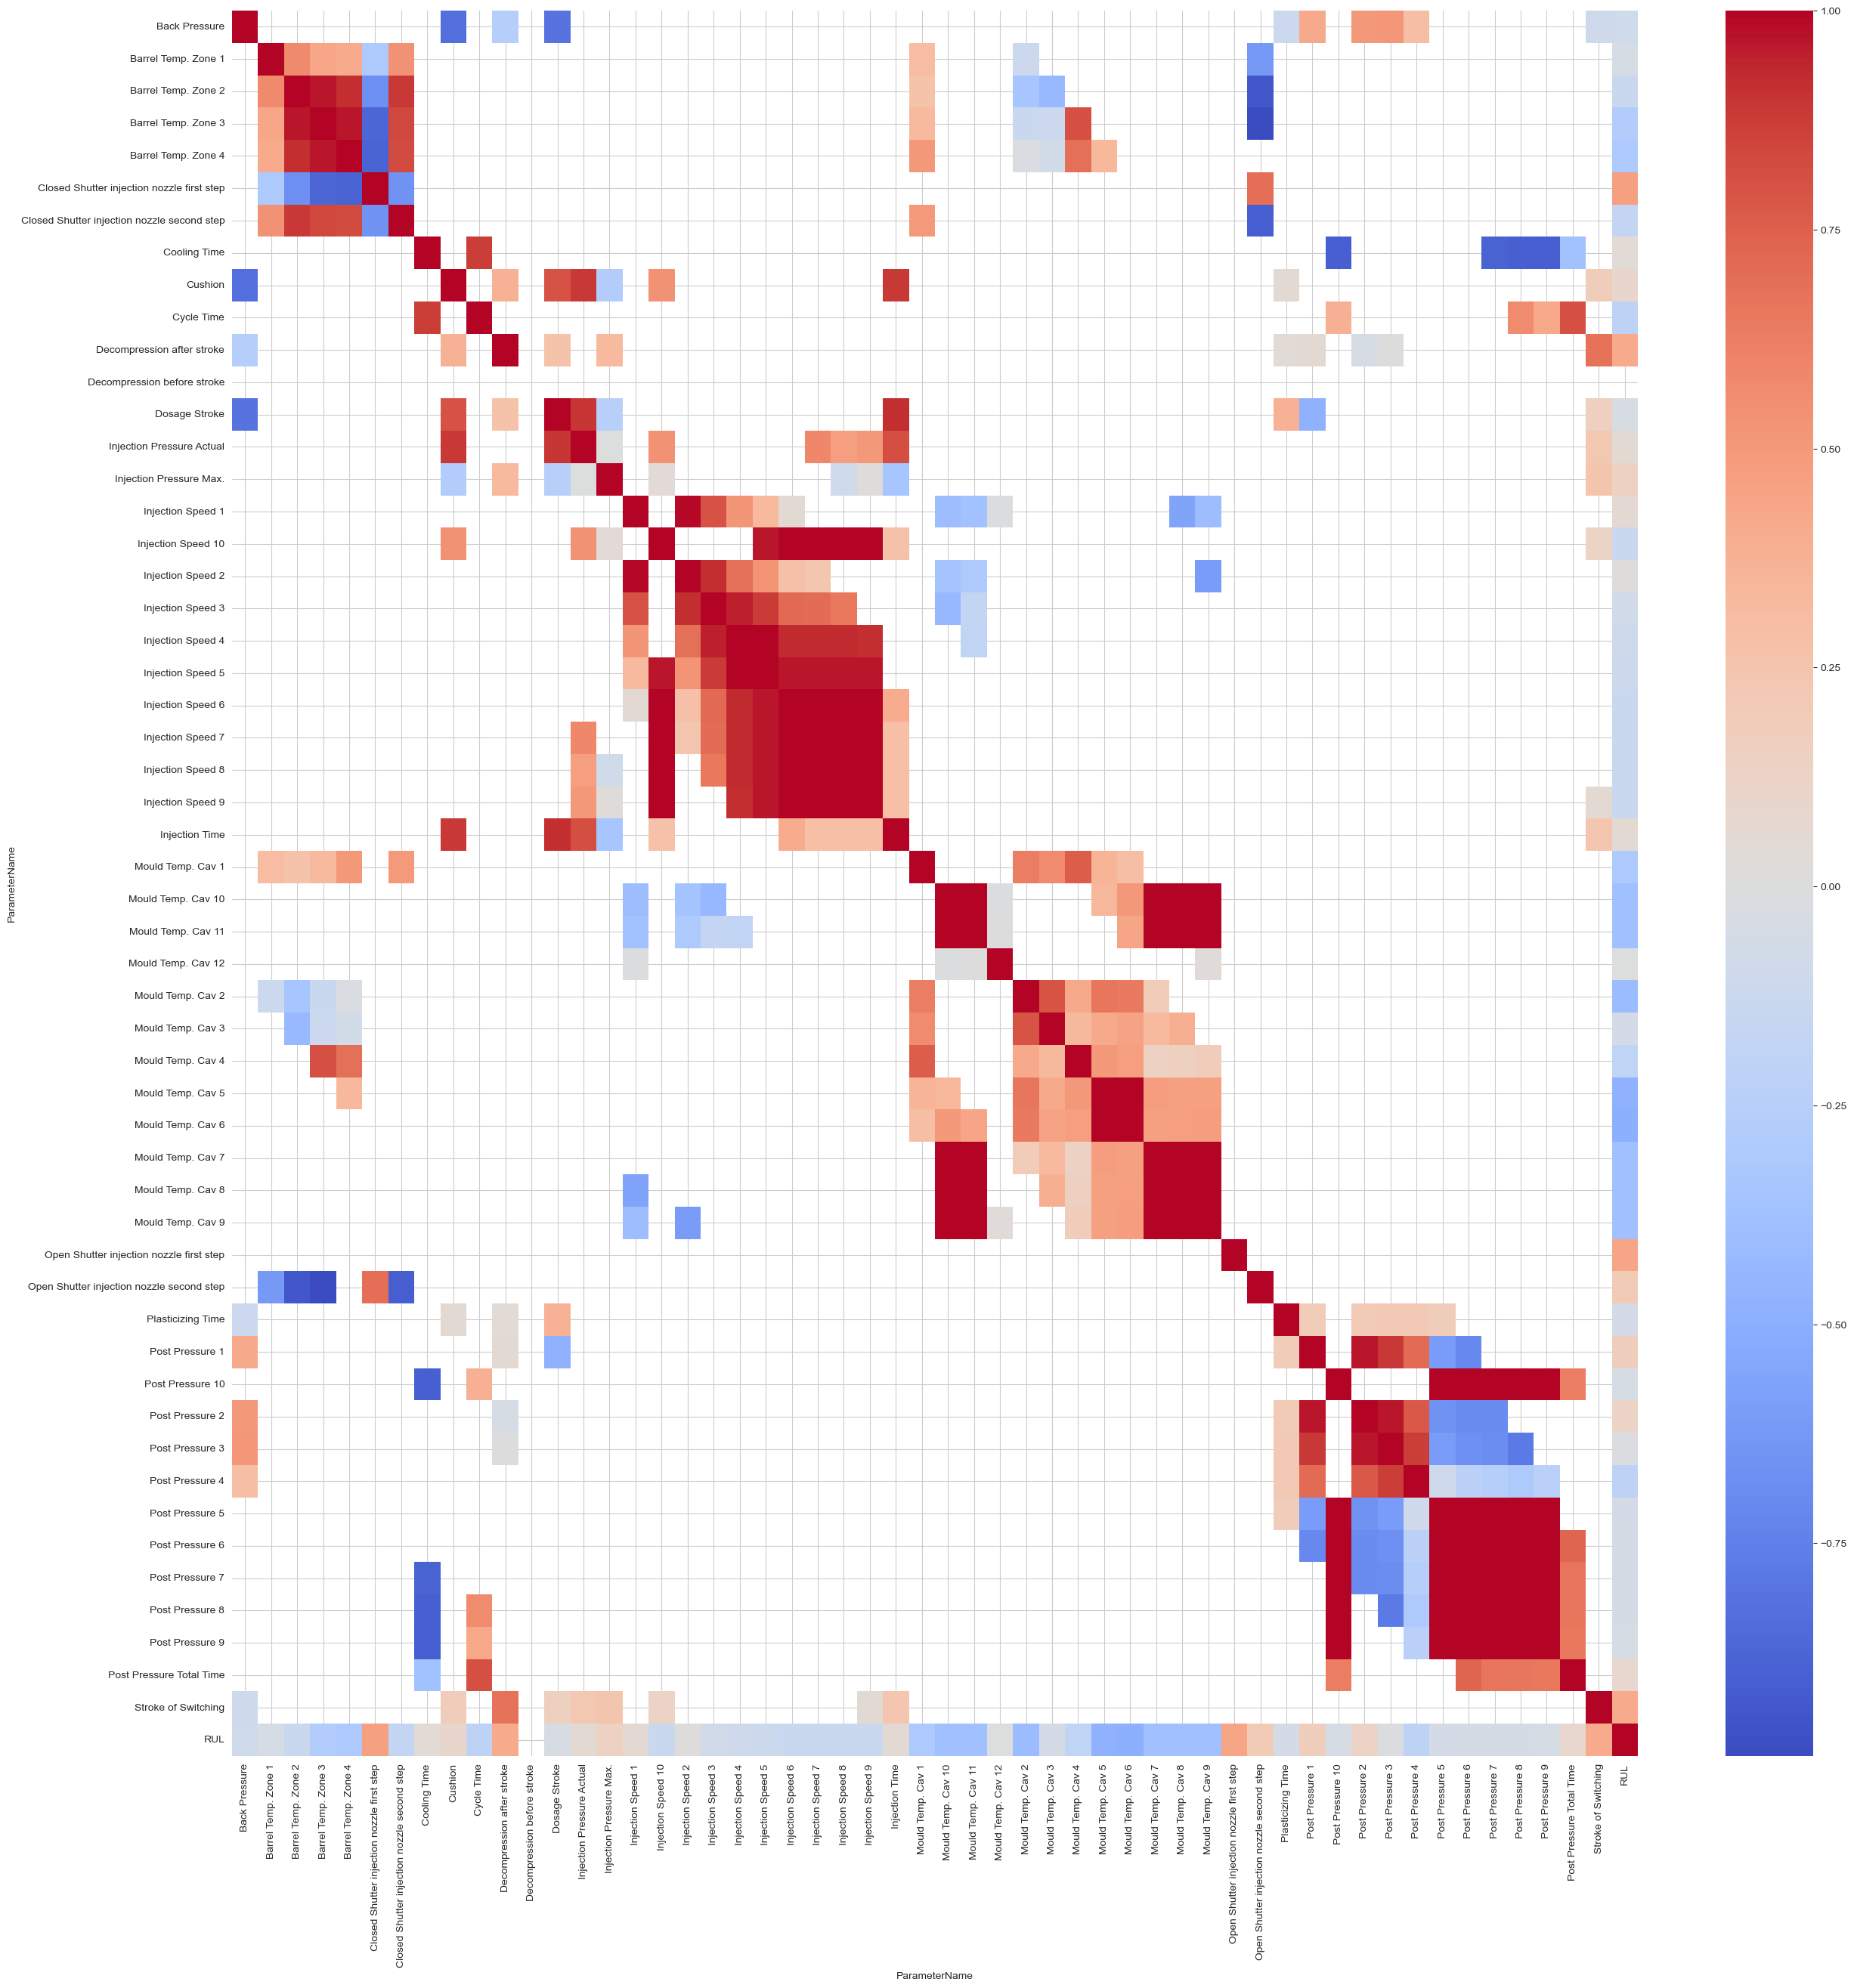

In [10]:
correlation_matrix_generator(wc109)

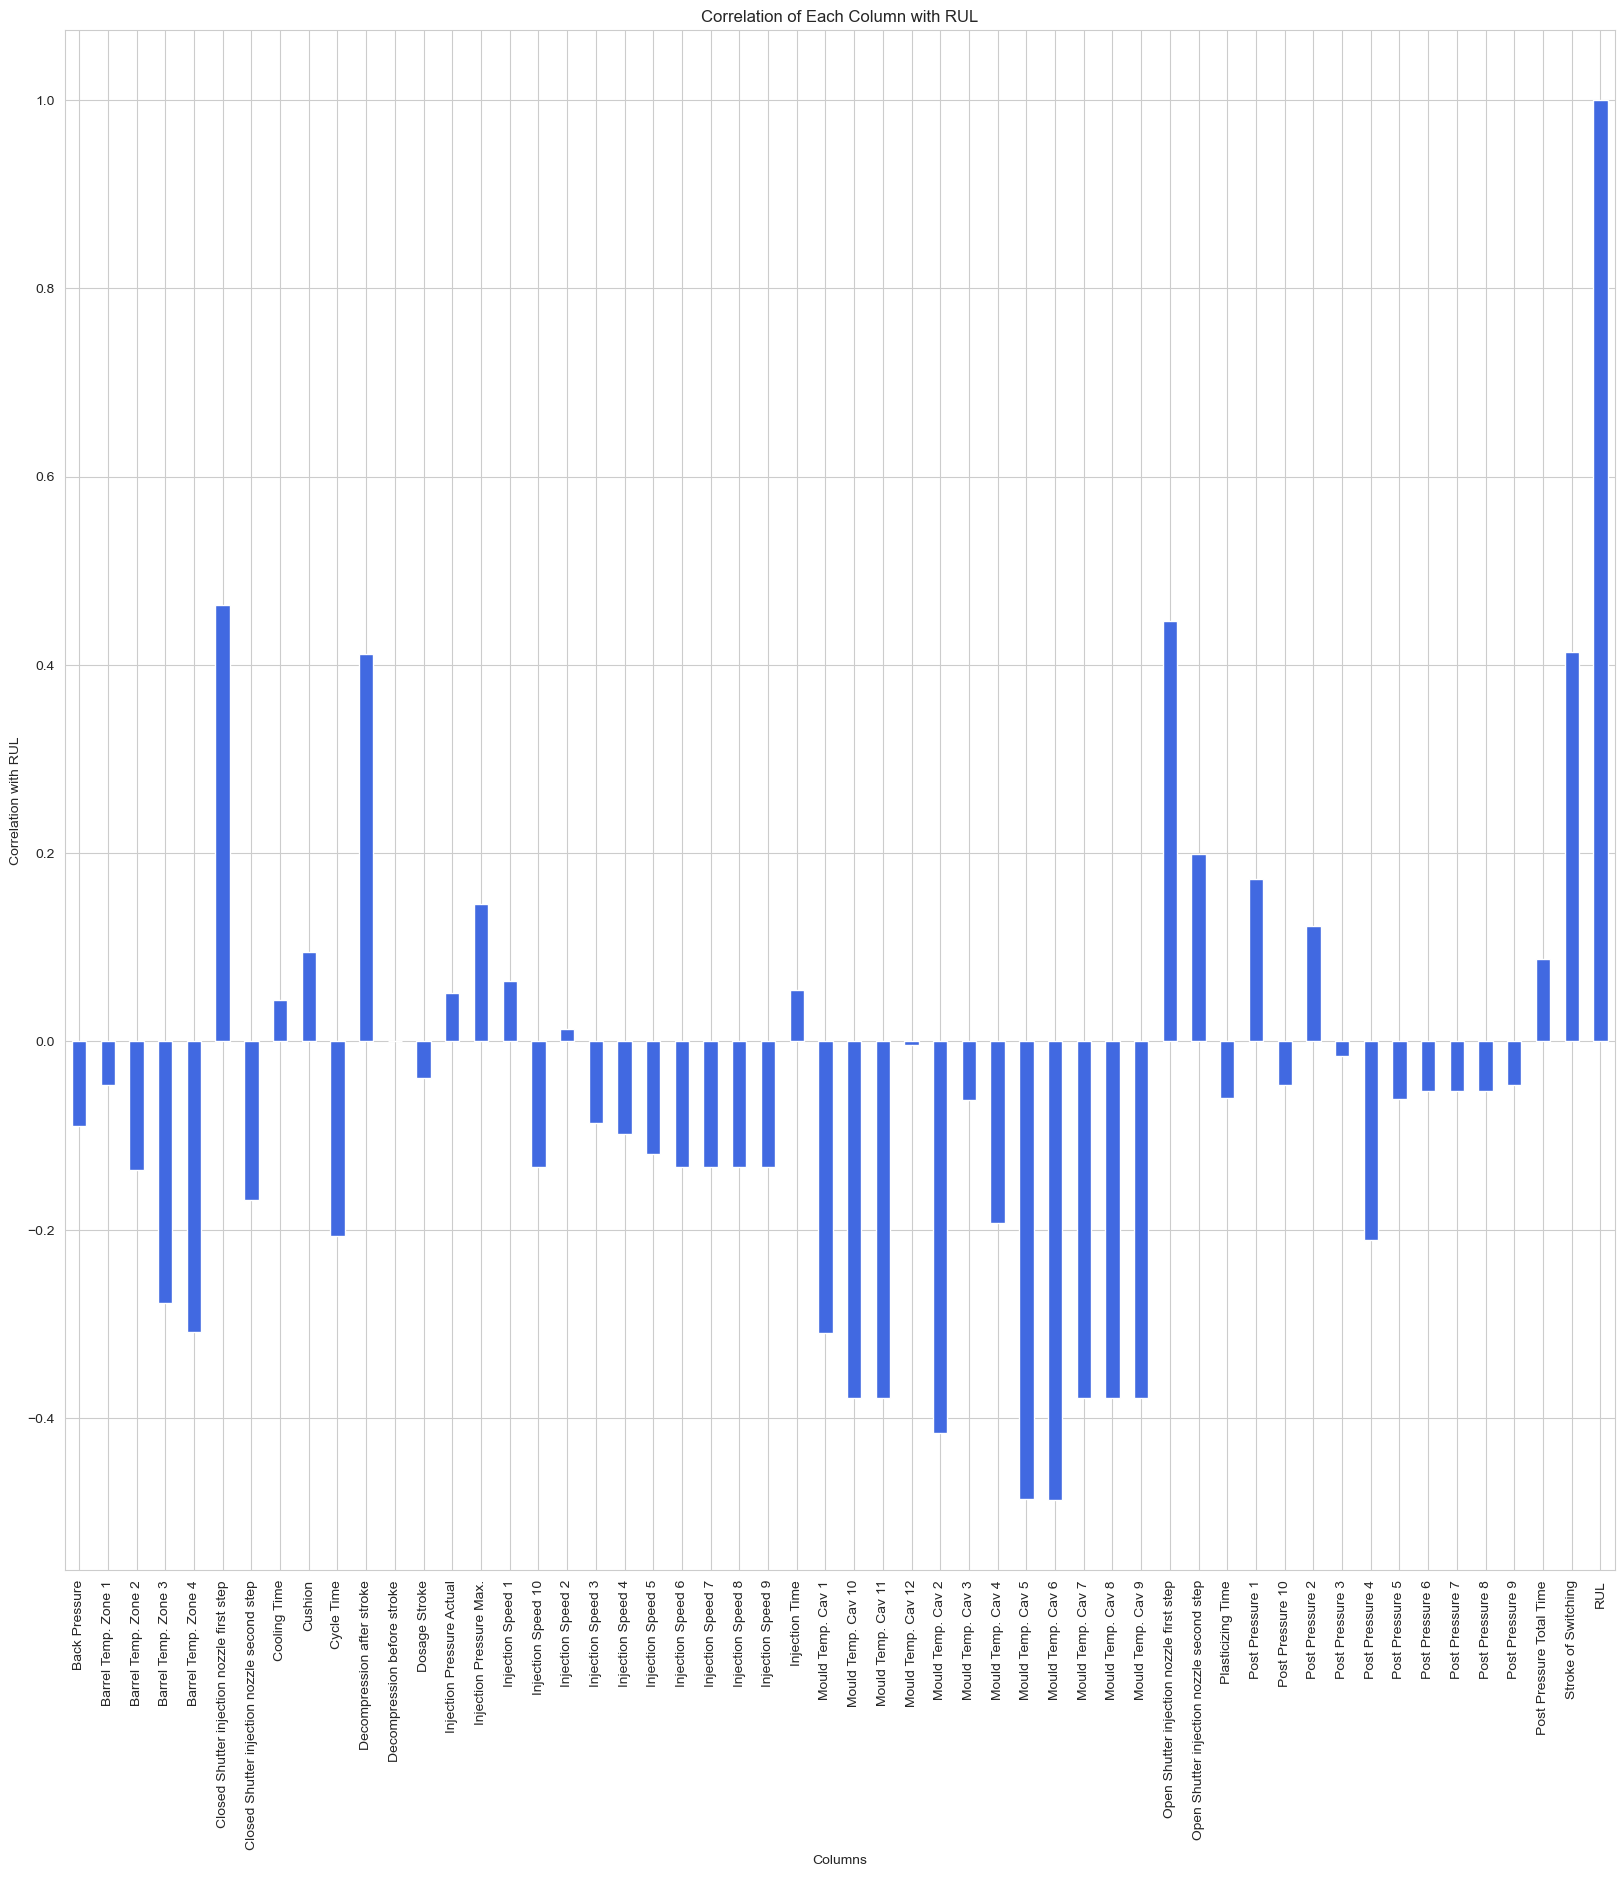

In [11]:
correlations_with_rul(wc109)

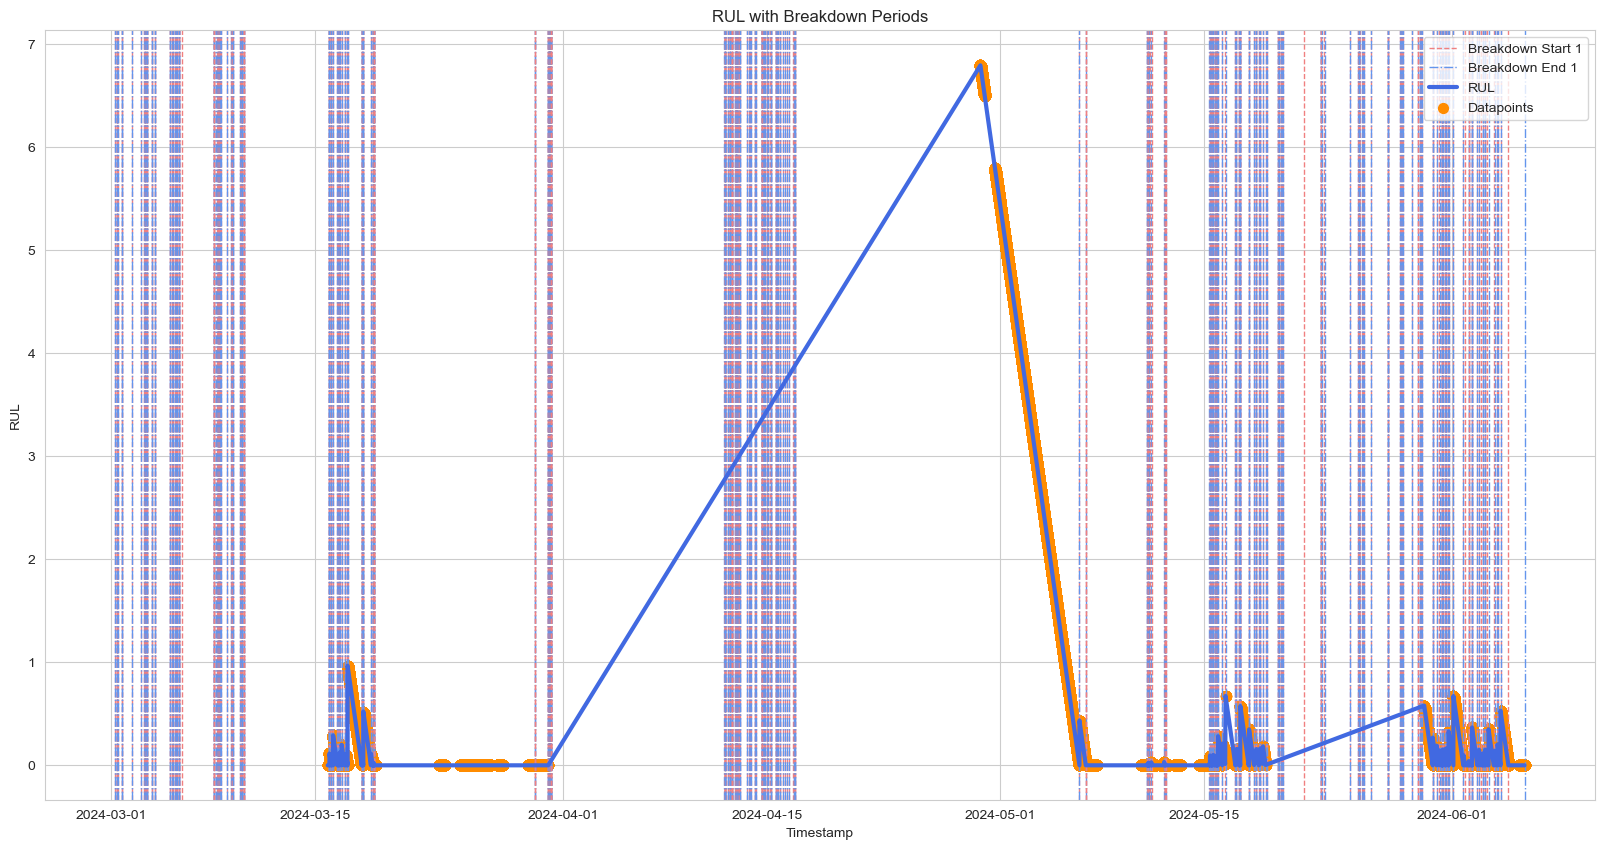

In [12]:
rul_graph_generator(wc109, wc109BD)

GRAPHS FOR DATASET 105

In [13]:
wc105, wc105BD = preprocess(wc105, wc105BD)
wc105 = compute_rul(wc105, wc105BD)

ParameterName                                Back Pressure  \
ParameterName                                                
Back Pressure                                     1.000000   
Barrel Temp. Zone 1                                    NaN   
Barrel Temp. Zone 2                                    NaN   
Barrel Temp. Zone 3                                    NaN   
Barrel Temp. Zone 4                                    NaN   
Closed Shutter injection nozzle first step             NaN   
Closed Shutter injection nozzle second step            NaN   
Cooling Time                                           NaN   
Cushion                                          -0.443997   
Cycle Time                                             NaN   
Decompression after stroke                        0.138993   
Decompression before stroke                      -0.003498   
Dosage Stroke                                    -0.035729   
Injection Pressure Actual                              NaN   
Injectio

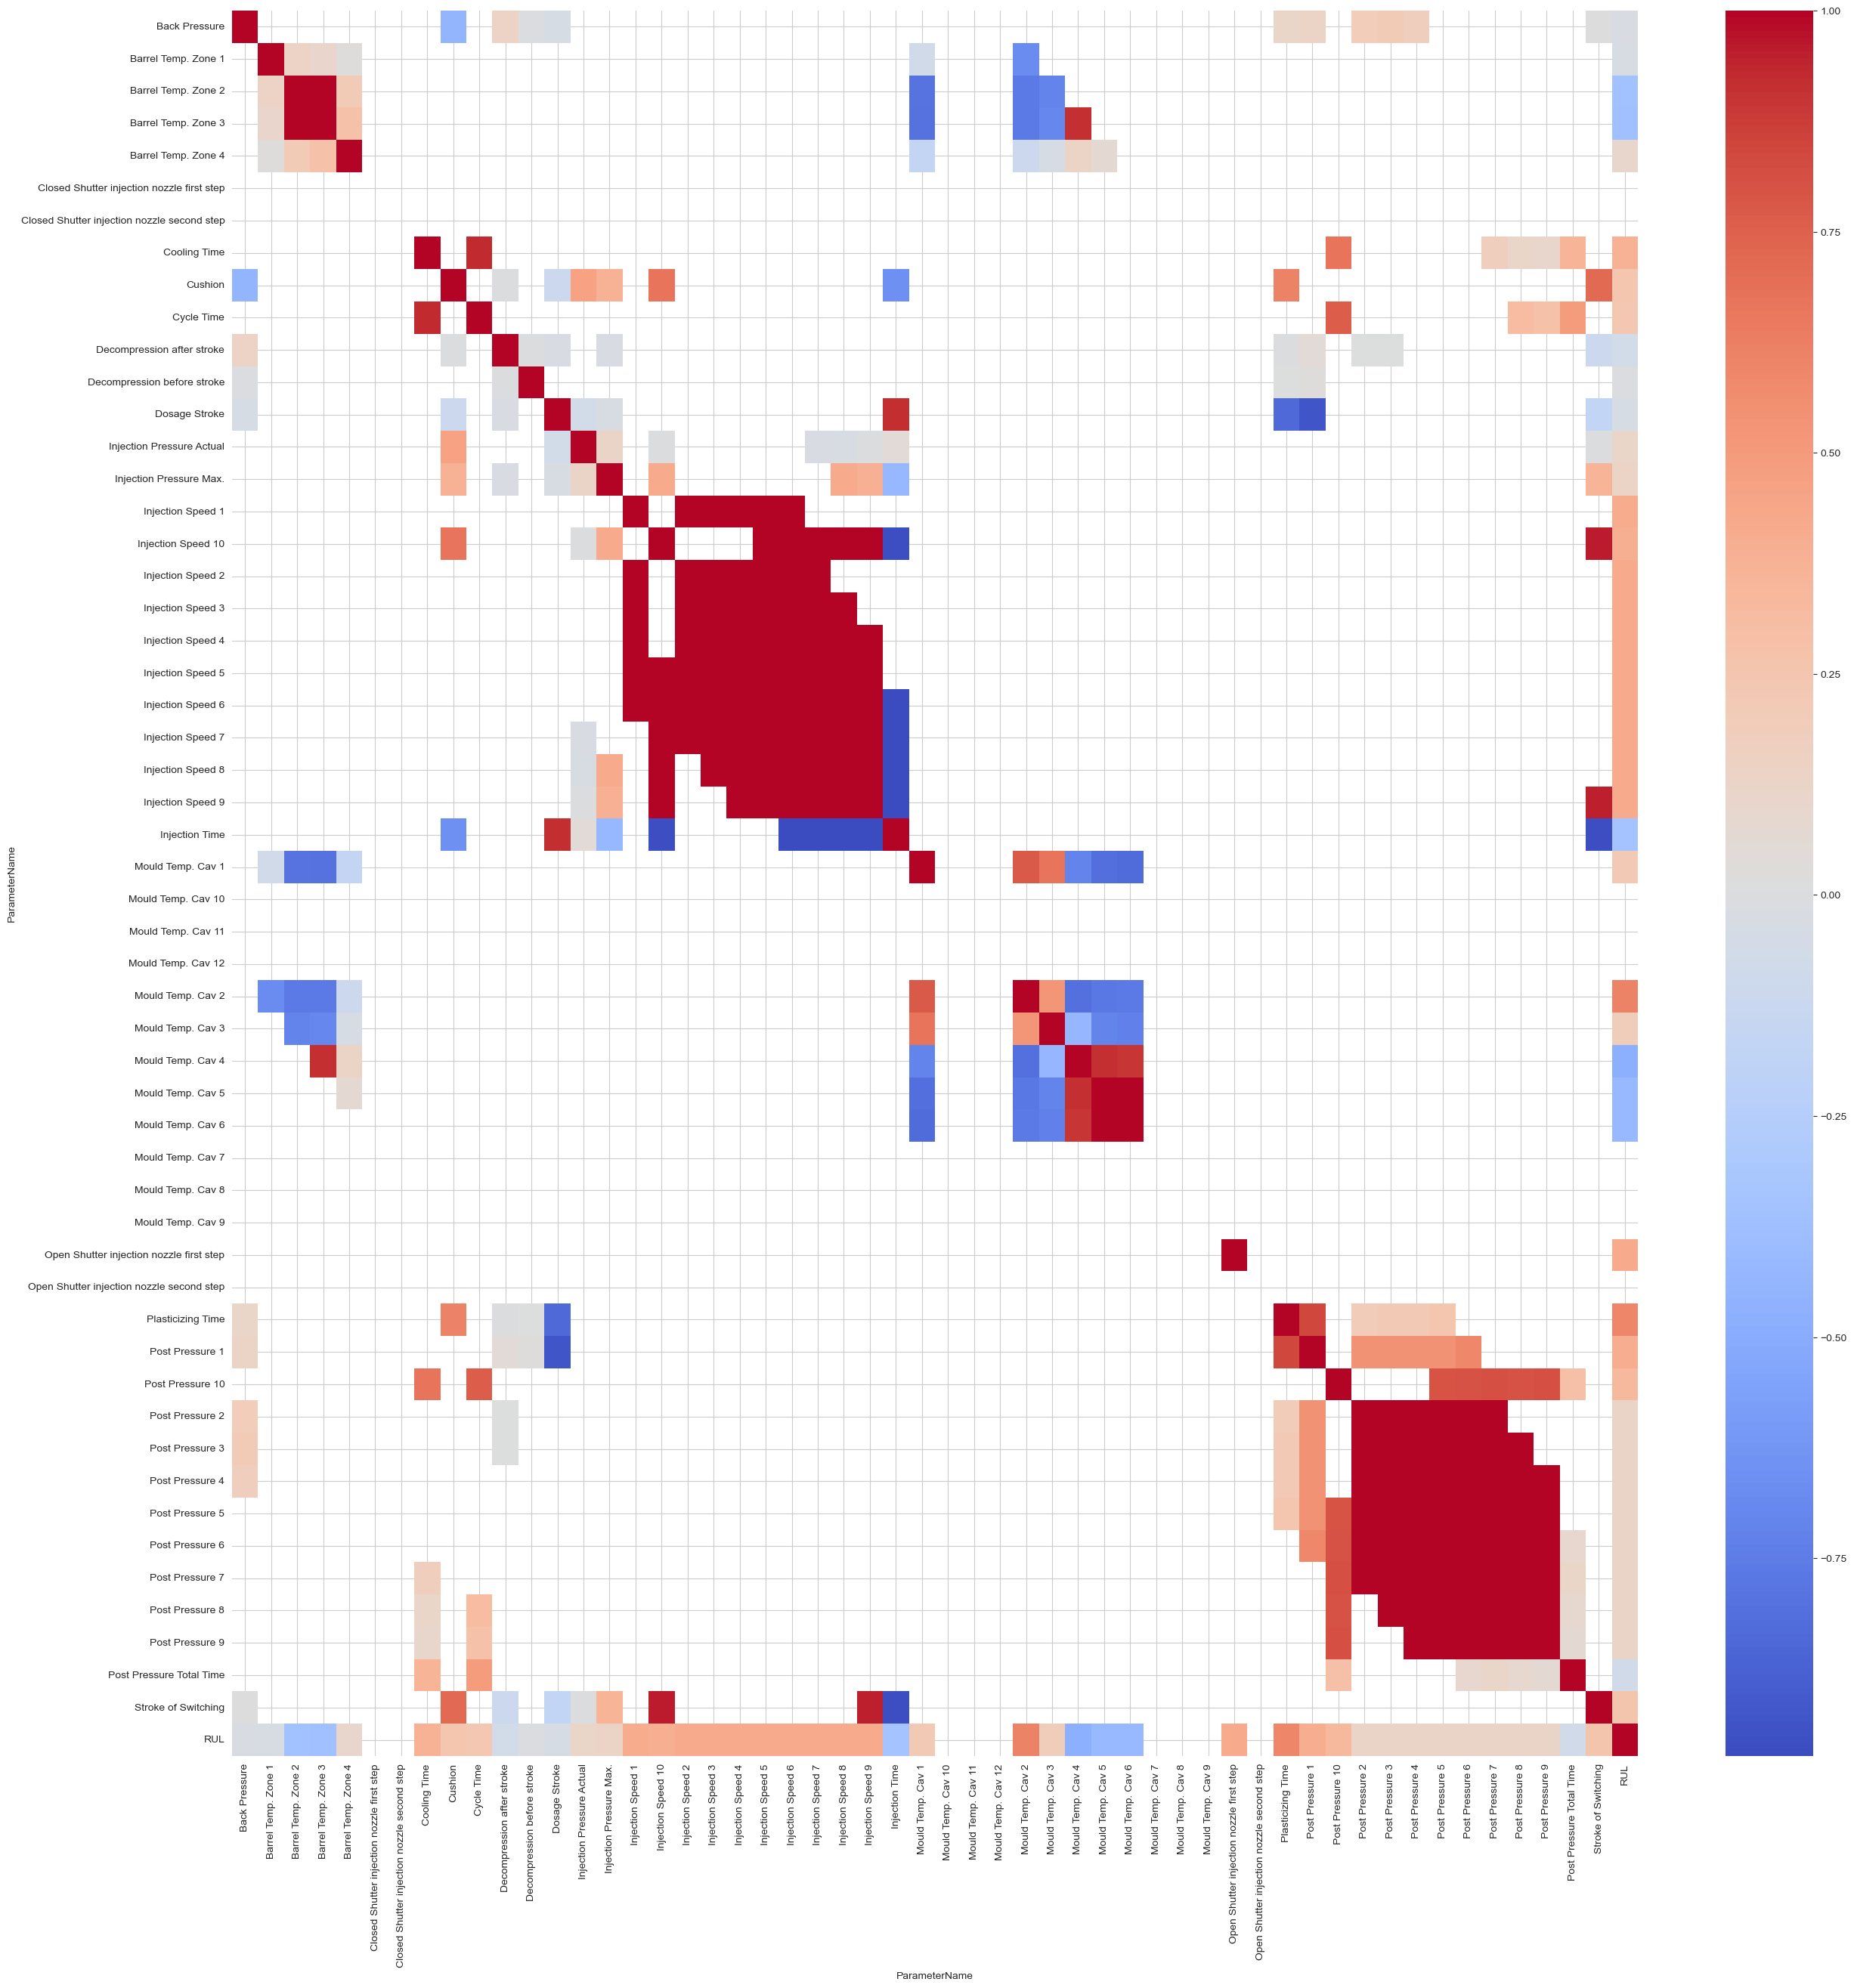

In [14]:
correlation_matrix_generator(wc105)

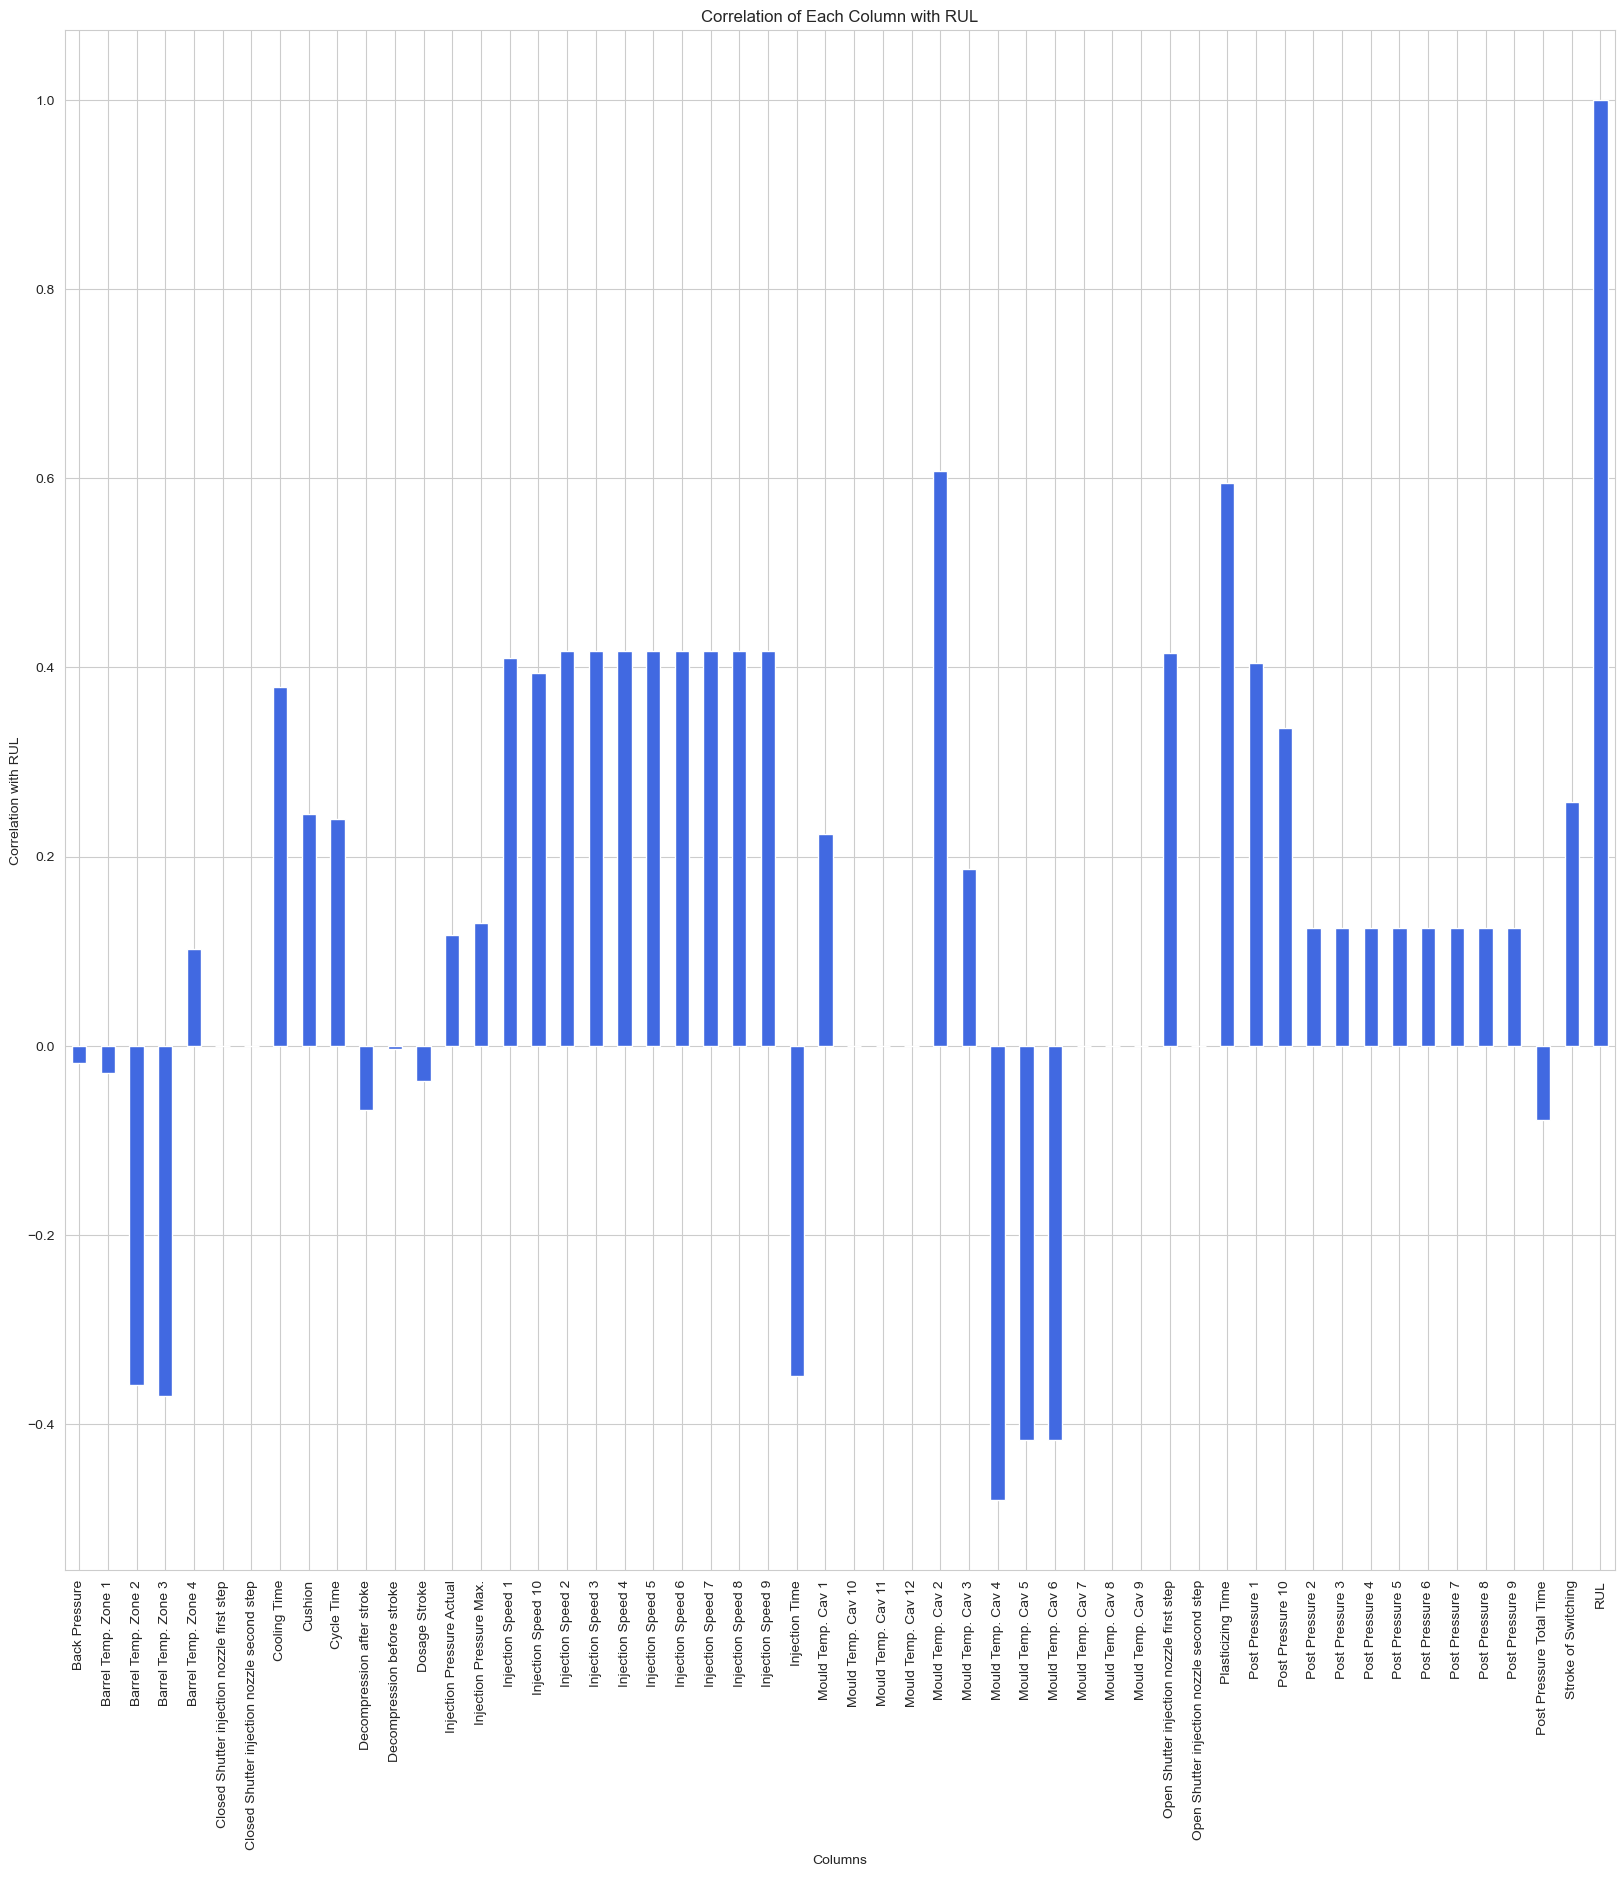

In [15]:
correlations_with_rul(wc105)

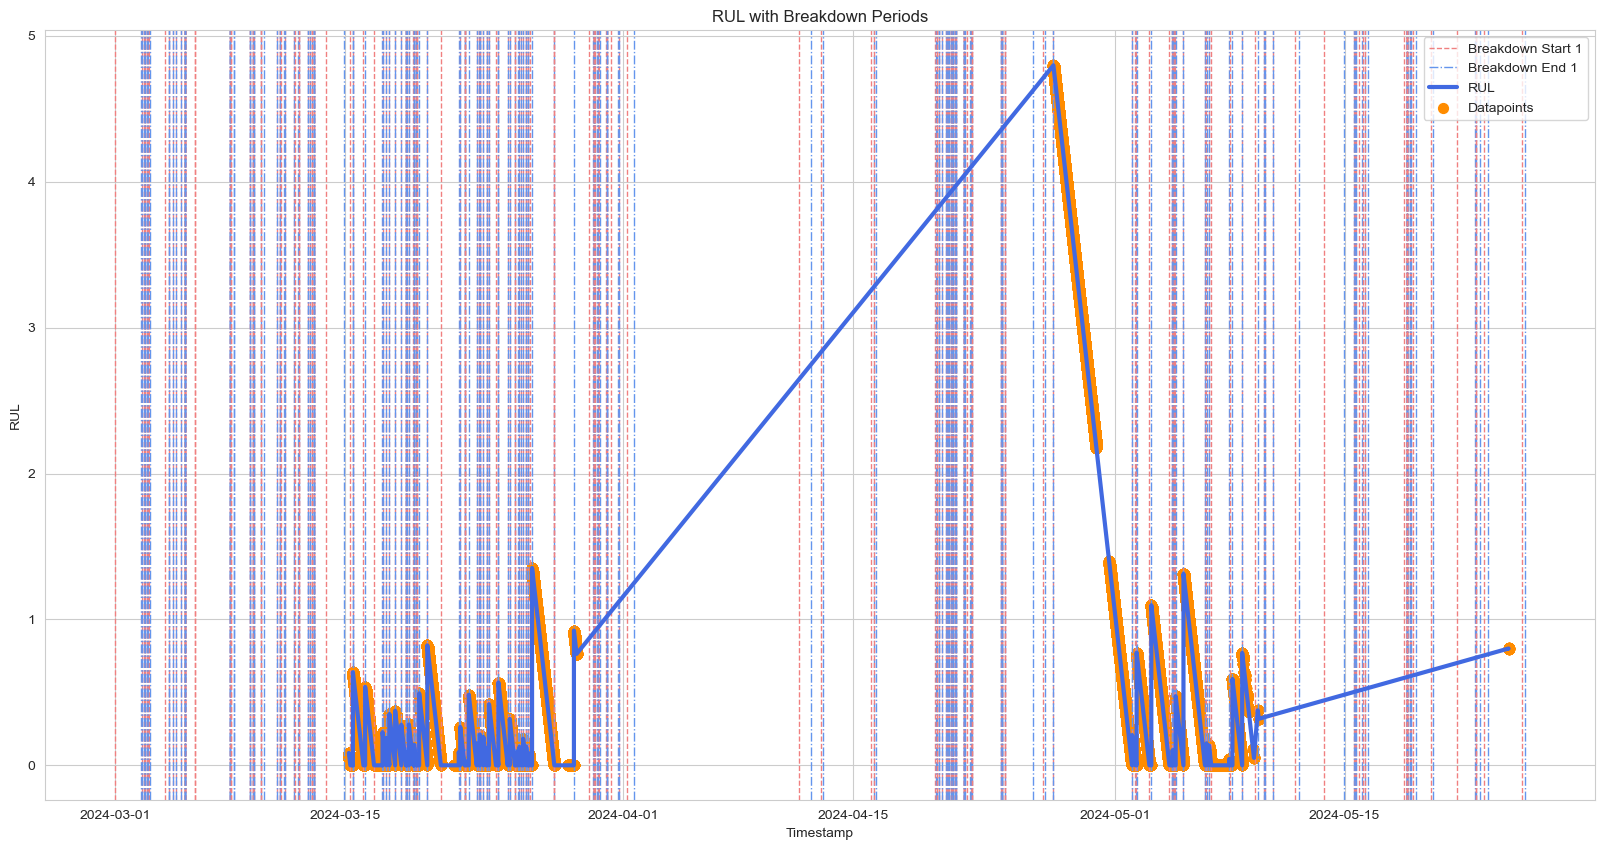

In [16]:
rul_graph_generator(wc105, wc105BD)

GRAPHS FOR DATASET 110

In [17]:
wc110, wc110BD = preprocess(wc110, wc110BD)
wc110 = compute_rul(wc110, wc110BD)

ParameterName                                Back Pressure  \
ParameterName                                                
Back Pressure                                     1.000000   
Barrel Temp. Zone 1                                    NaN   
Barrel Temp. Zone 2                                    NaN   
Barrel Temp. Zone 3                                    NaN   
Barrel Temp. Zone 4                                    NaN   
Closed Shutter injection nozzle first step             NaN   
Closed Shutter injection nozzle second step            NaN   
Cooling Time                                           NaN   
Cushion                                          -0.049433   
Cycle Time                                             NaN   
Decompression after stroke                             NaN   
Decompression before stroke                            NaN   
Dosage Stroke                                     0.087782   
Injection Pressure Actual                              NaN   
Injectio

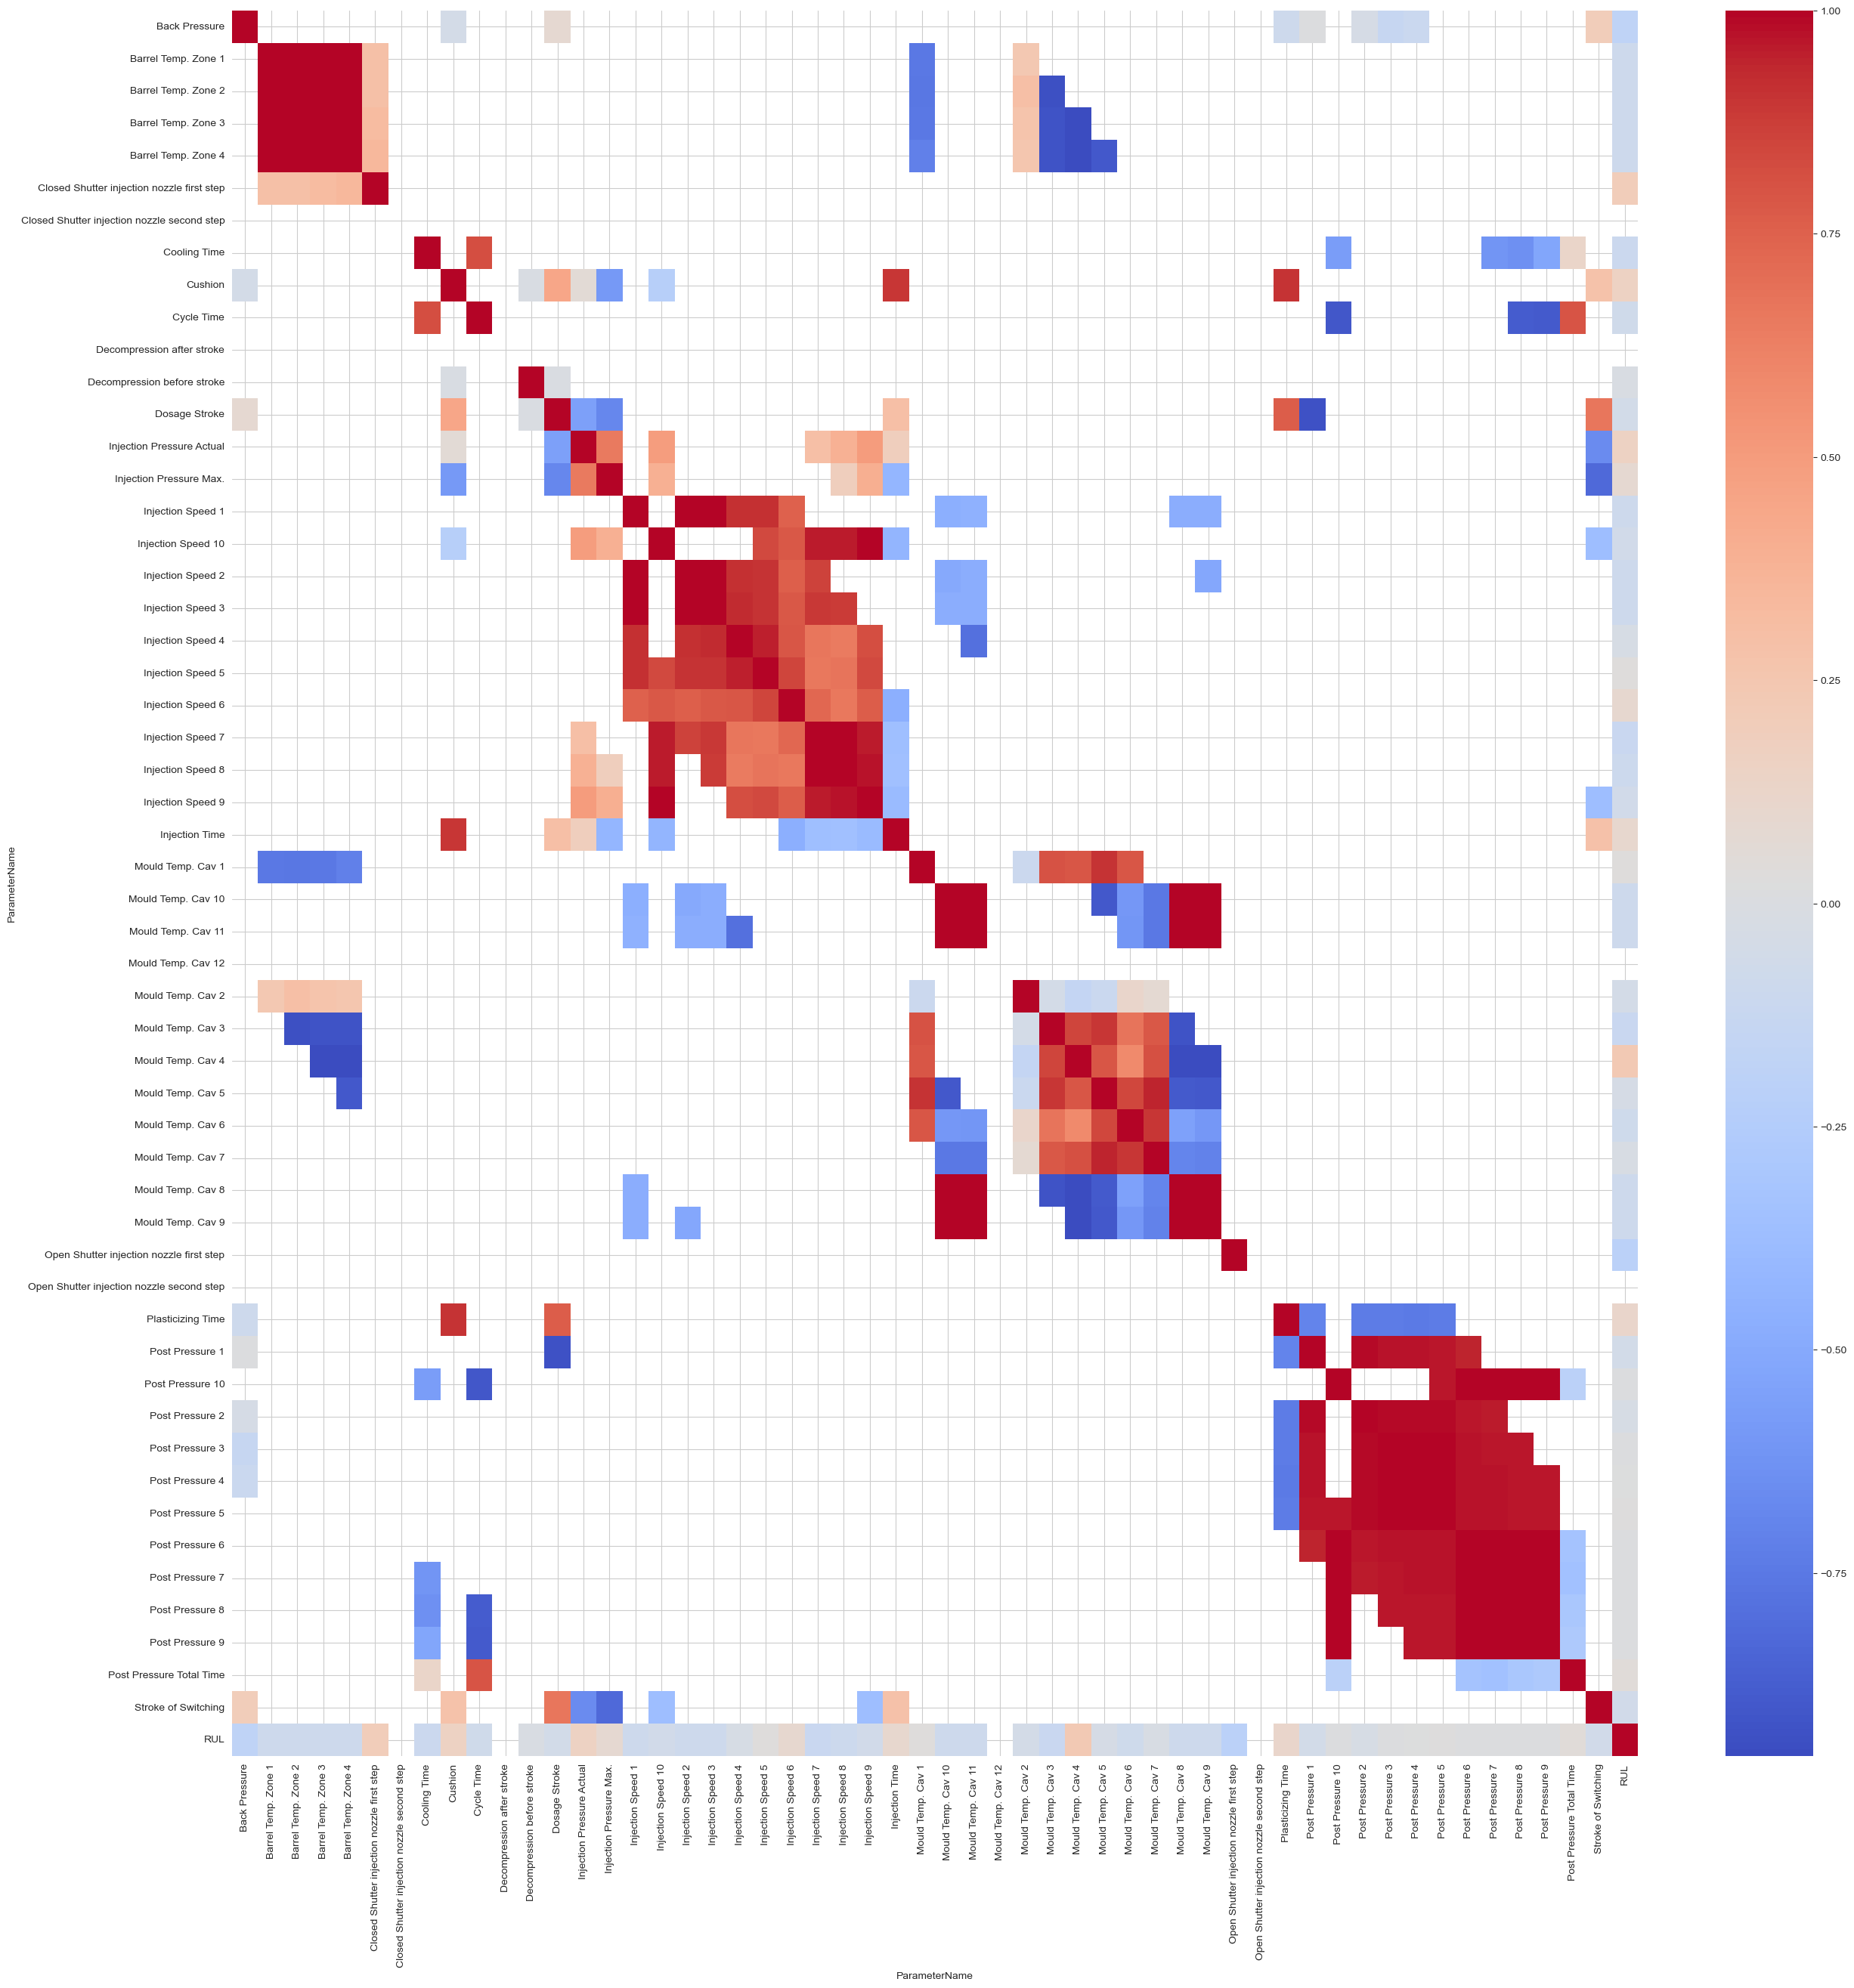

In [18]:
correlation_matrix_generator(wc110)

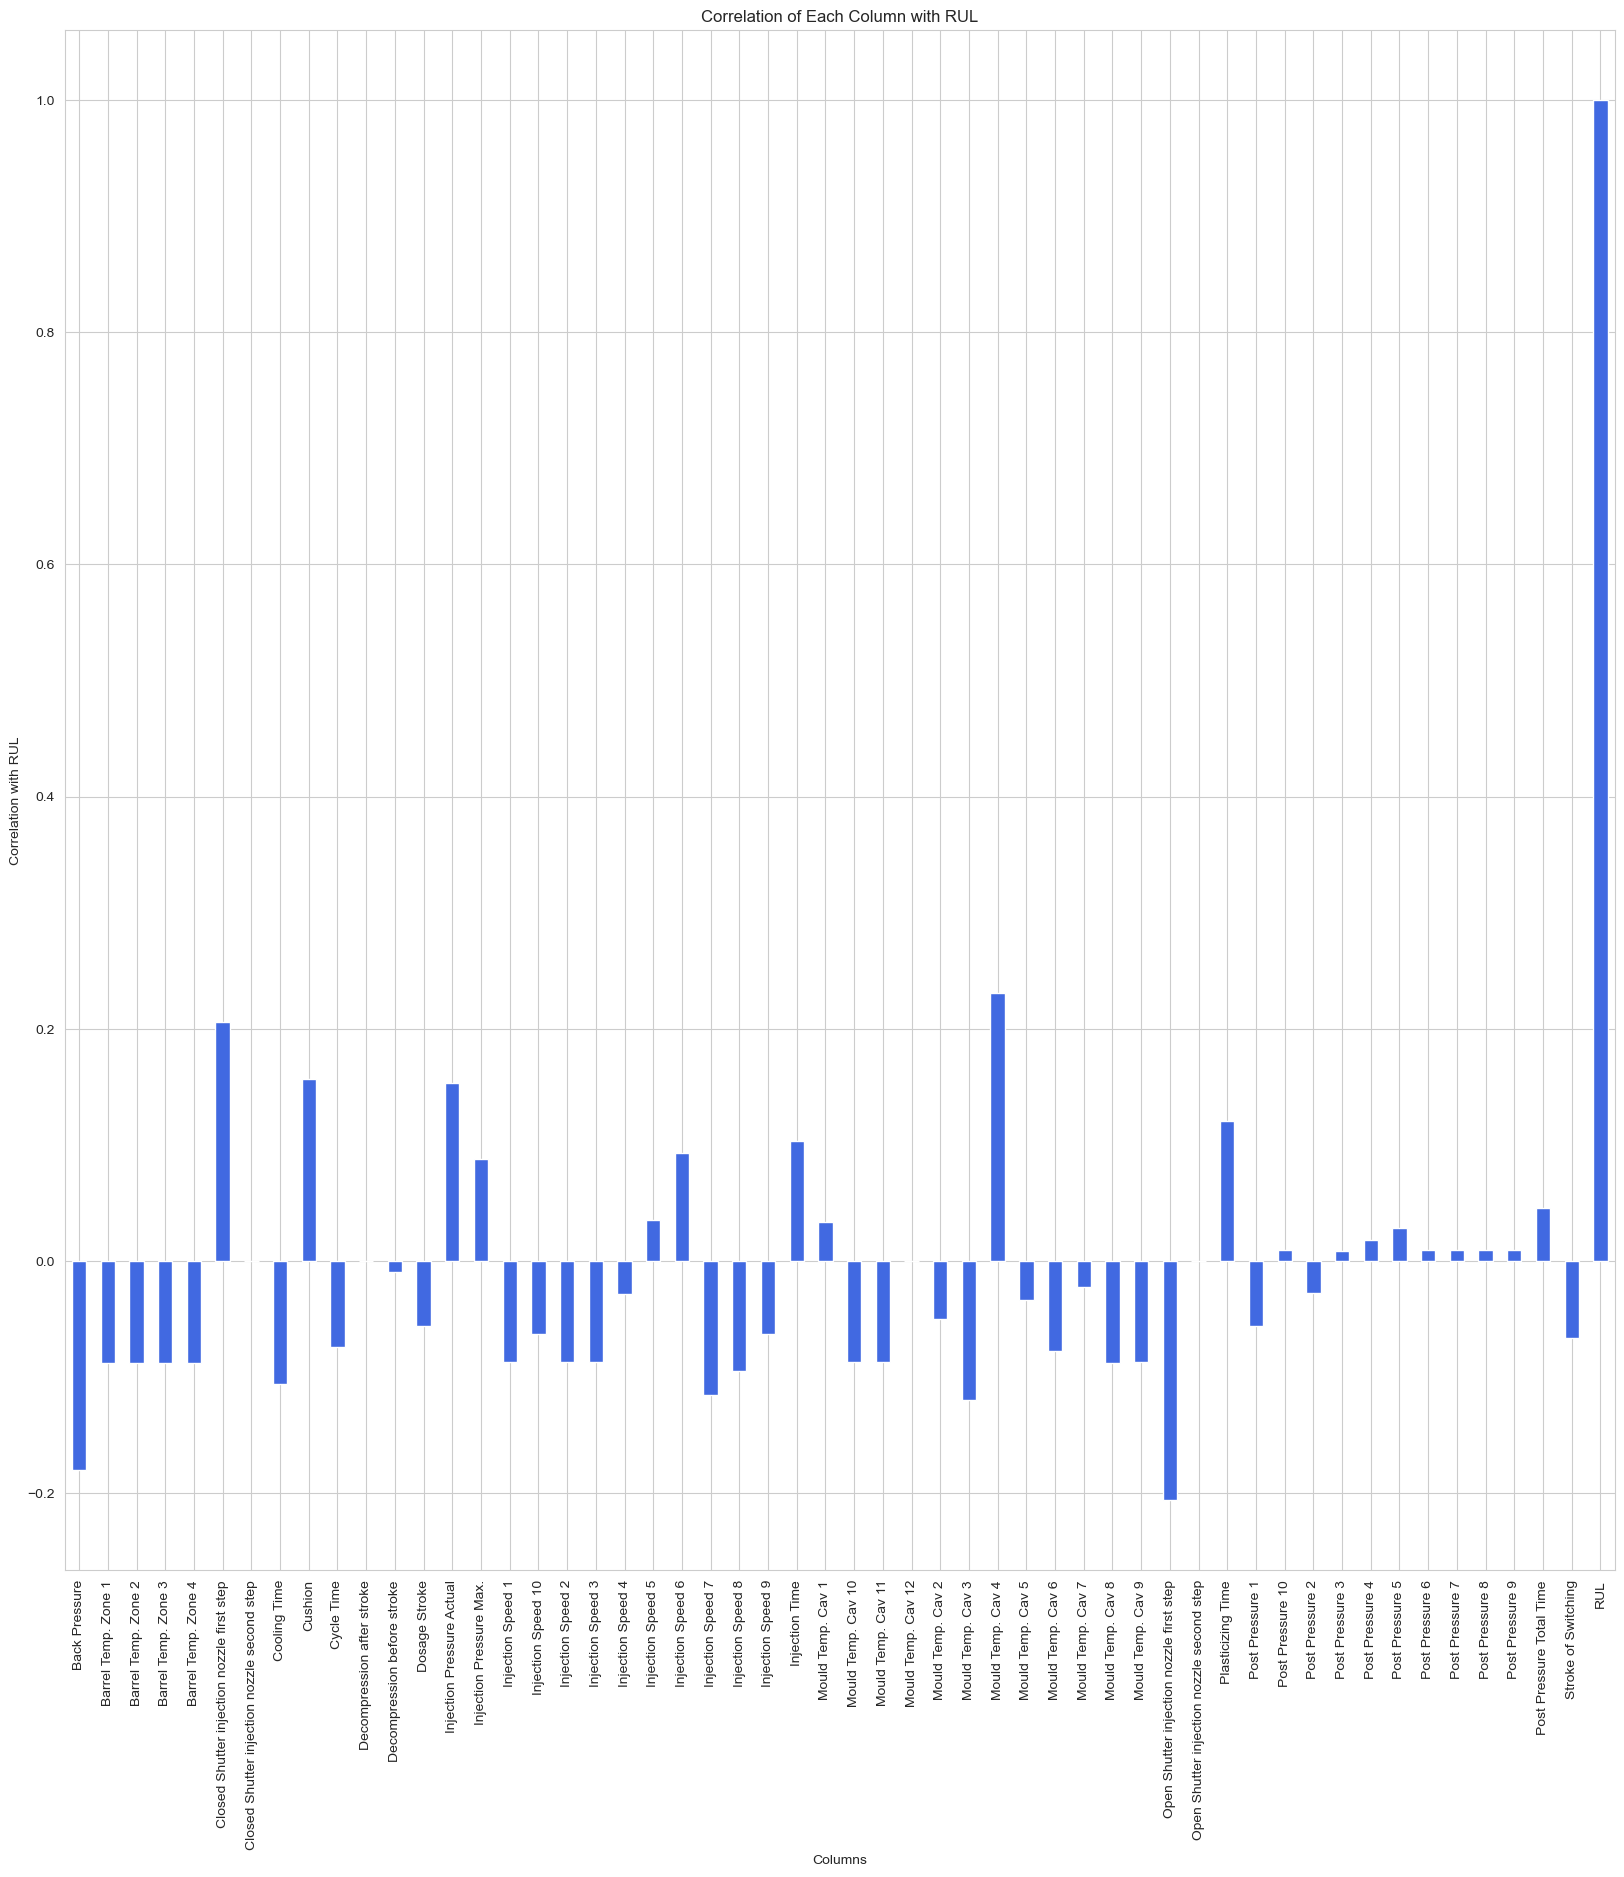

In [19]:
correlations_with_rul(wc110)

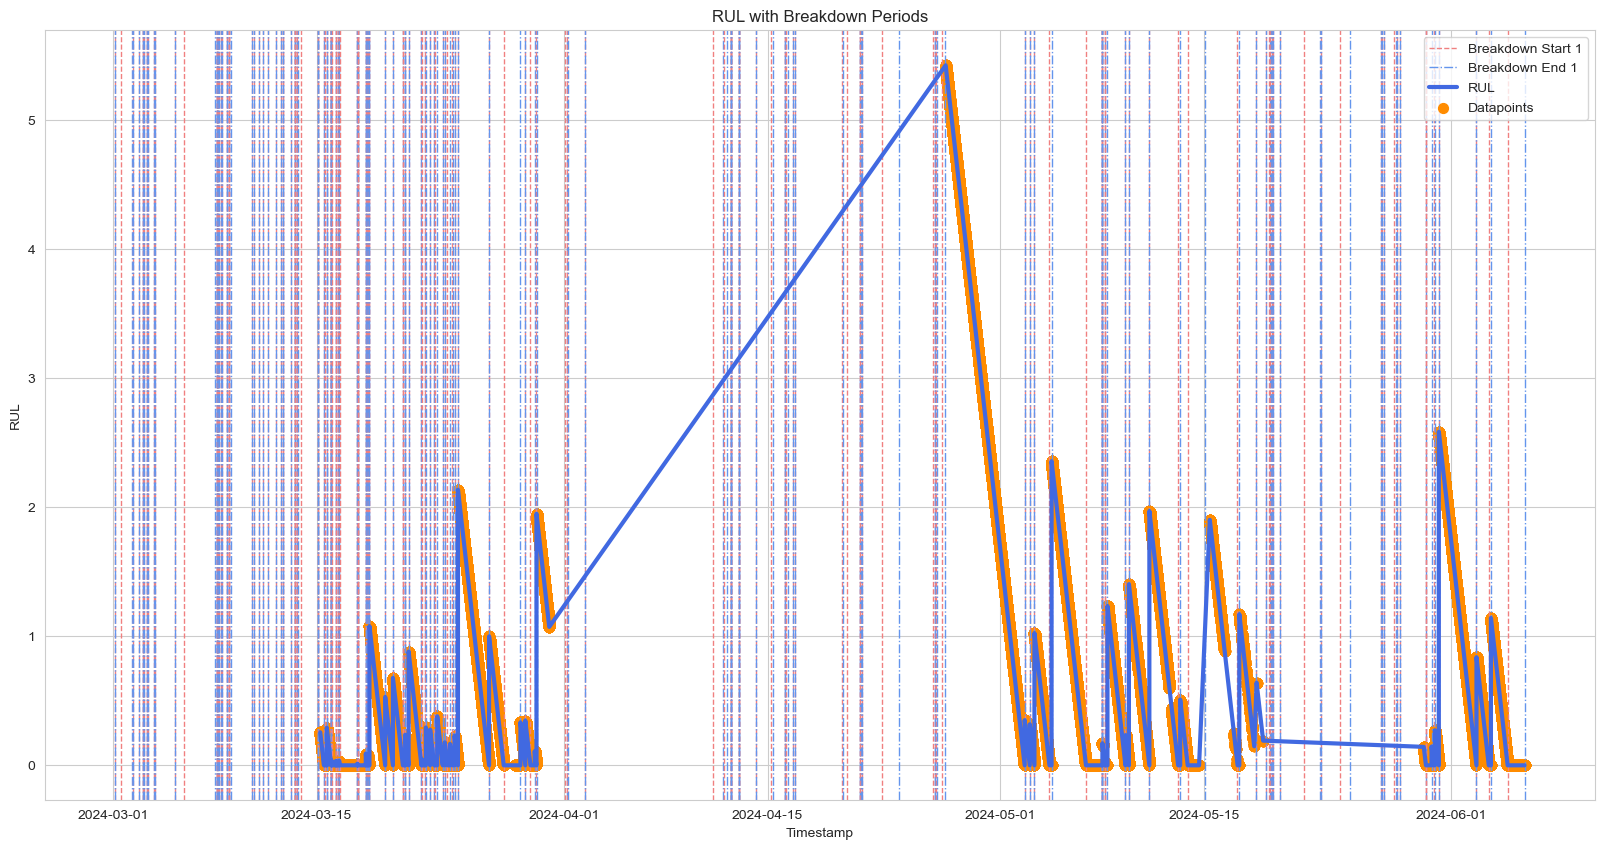

In [20]:
rul_graph_generator(wc110, wc110BD)

GRAPHS FOR DATASET 111

In [21]:
wc111, wc111BD = preprocess(wc111, wc111BD)
wc111 = compute_rul(wc111, wc111BD)

ParameterName                               Back Pressure  \
ParameterName                                               
Back Pressure                                    1.000000   
Barrel Temp. Zone 1                                   NaN   
Barrel Temp. Zone 2                                   NaN   
Barrel Temp. Zone 3                                   NaN   
Barrel Temp. Zone 4                                   NaN   
Closed Shutter injection nozzle first step            NaN   
Cooling Time                                          NaN   
Cushion                                         -0.161280   
Cycle Time                                            NaN   
Decompression after stroke                      -0.293250   
Decompression before stroke                           NaN   
Dosage Stroke                                    0.316178   
Injection Pressure Actual                             NaN   
Injection Pressure Max.                               NaN   
Injection Speed 1       

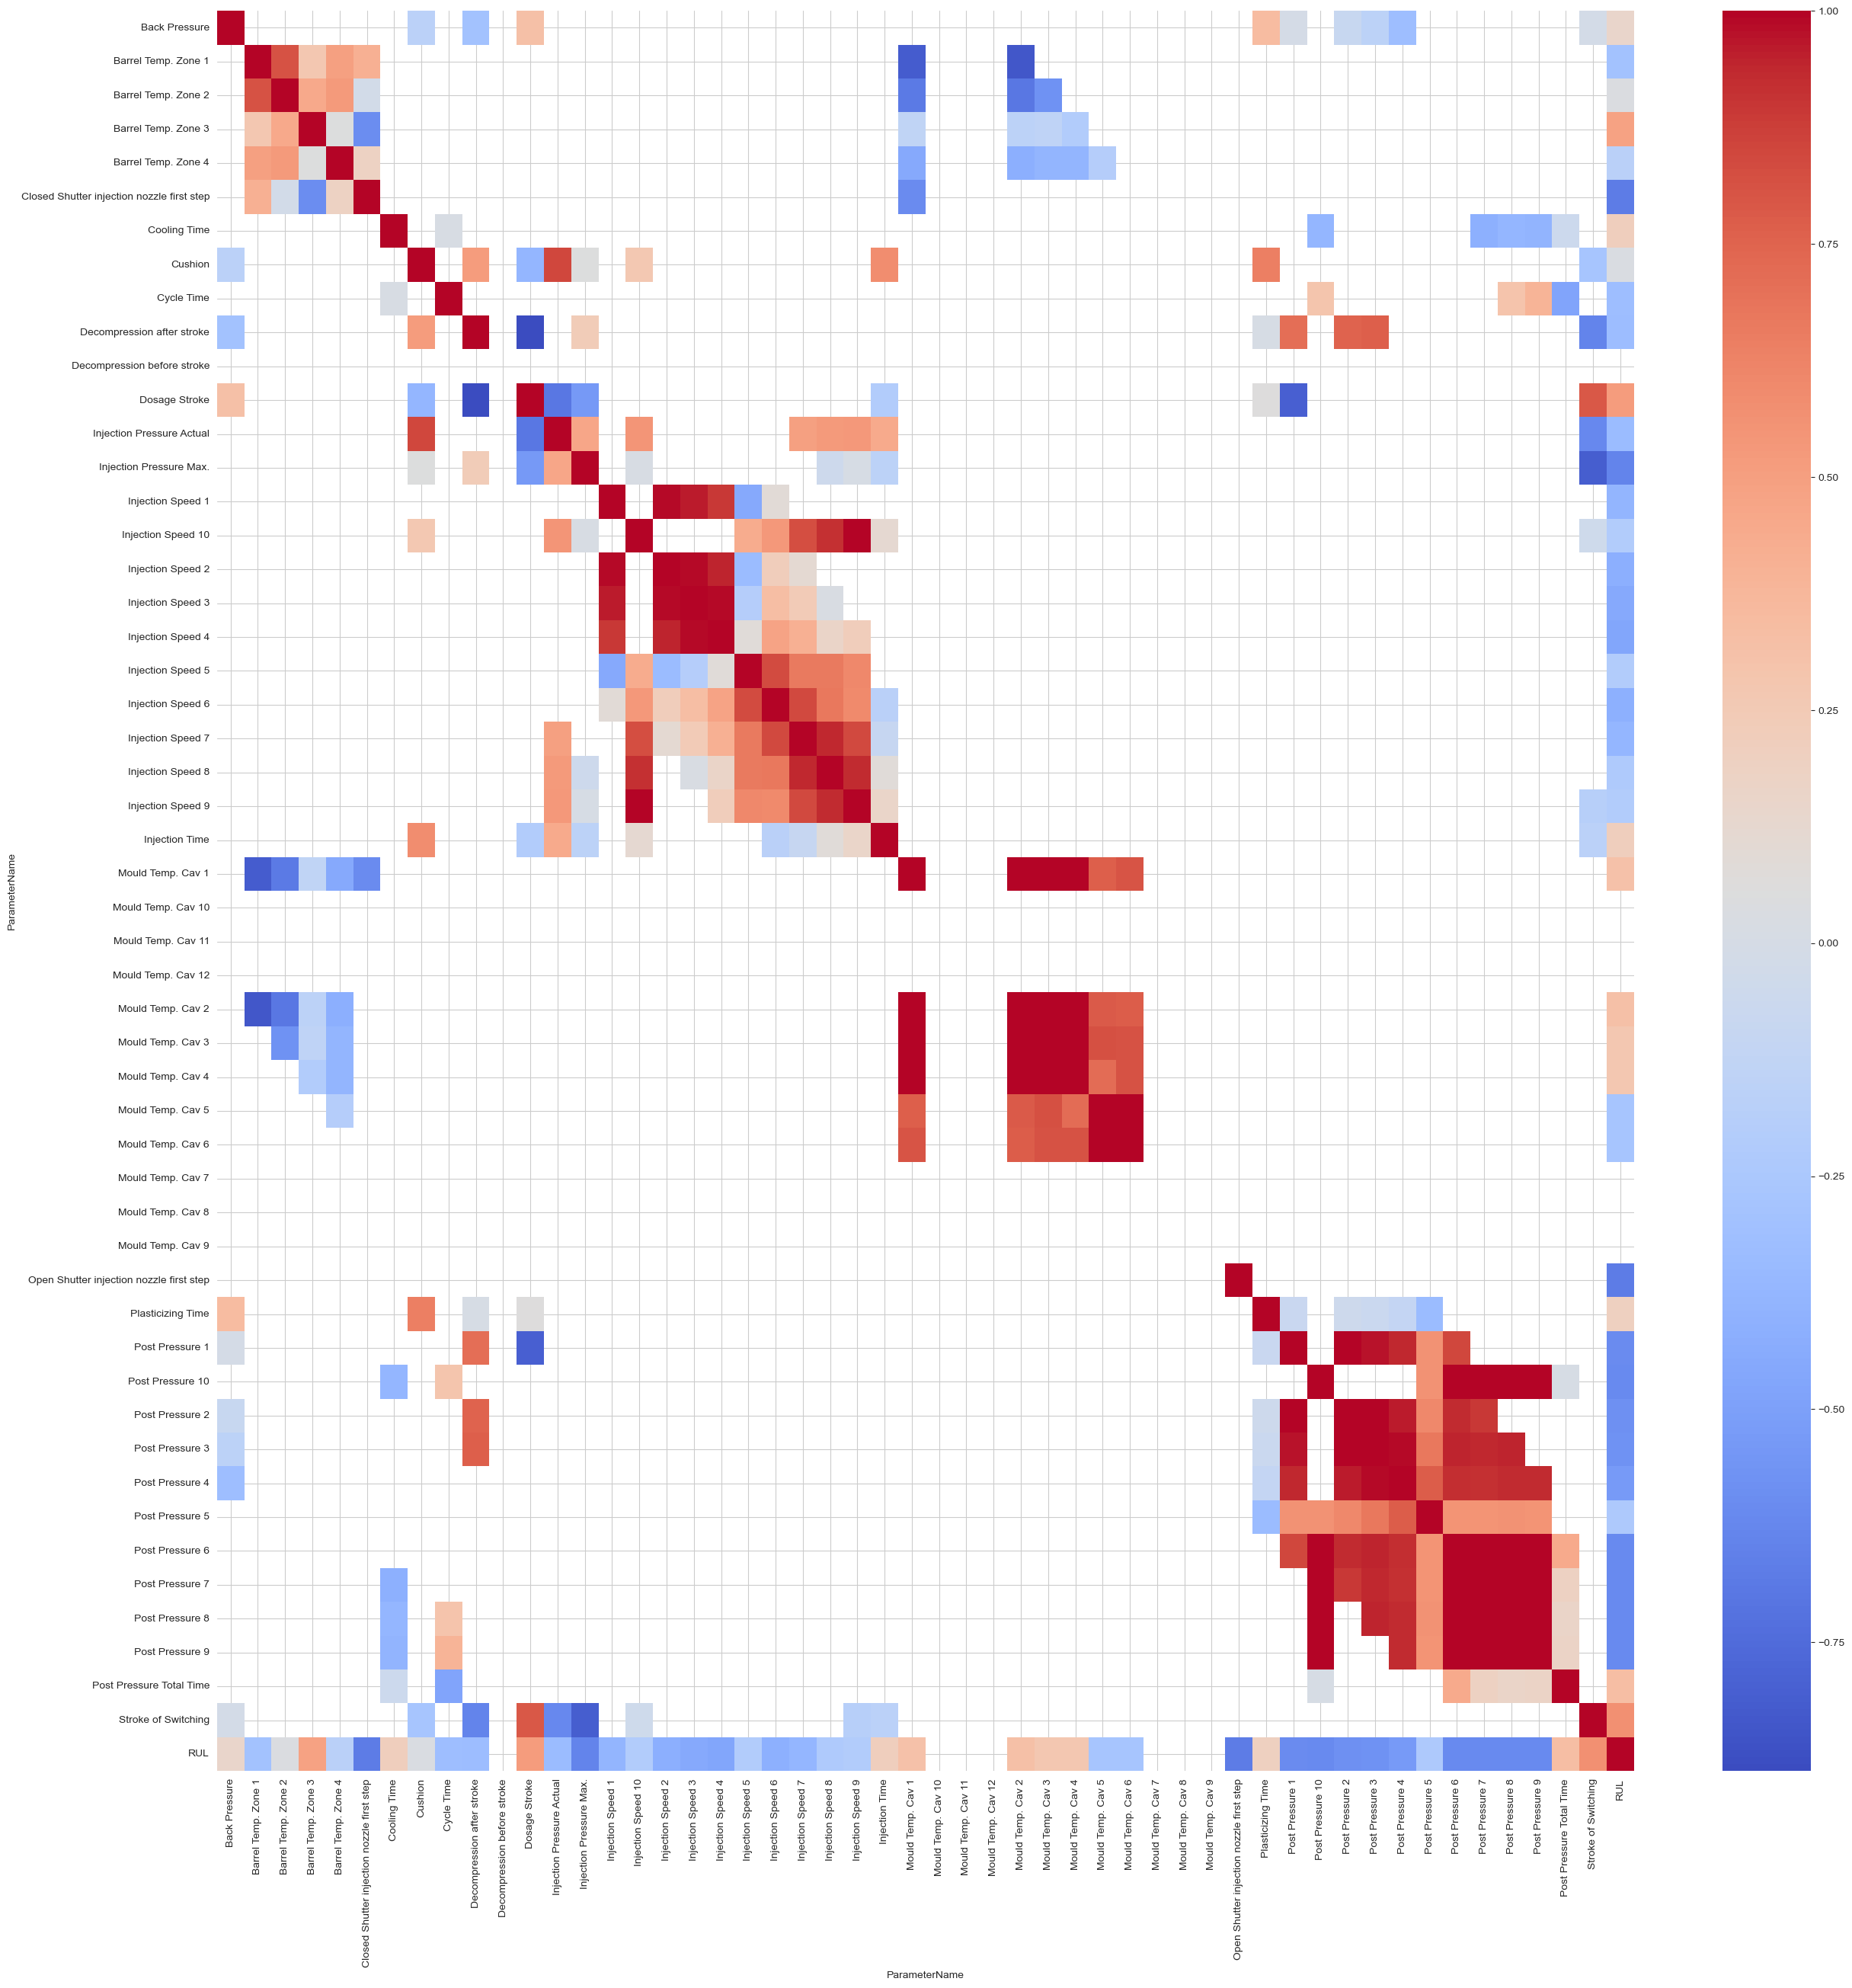

In [22]:
correlation_matrix_generator(wc111)

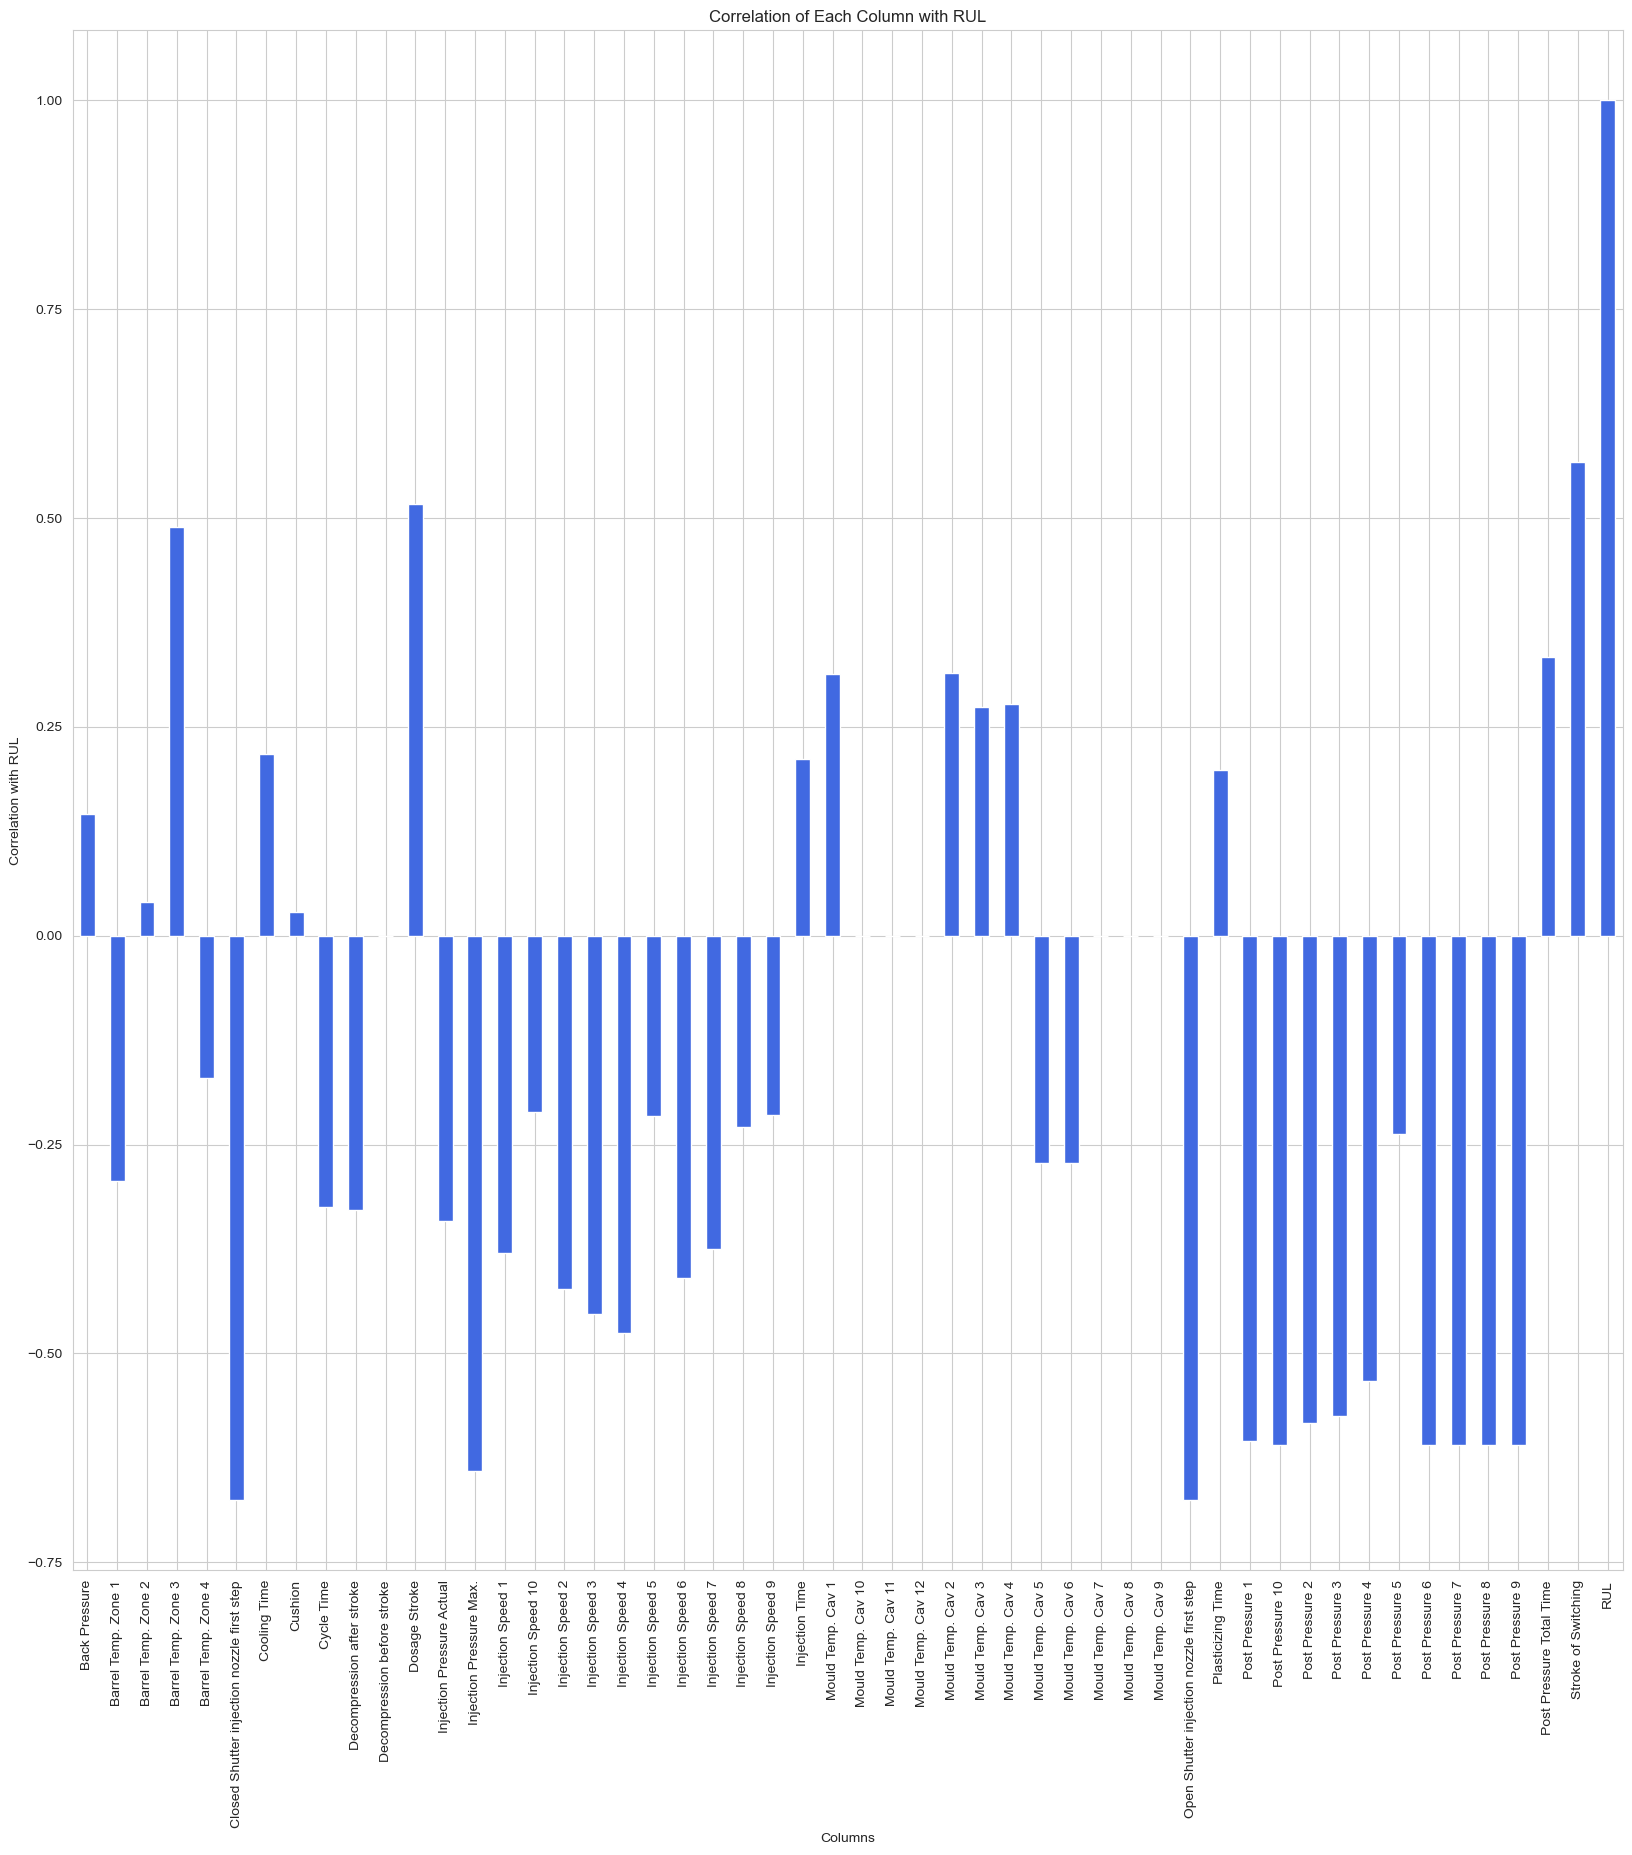

In [23]:
correlations_with_rul(wc111)

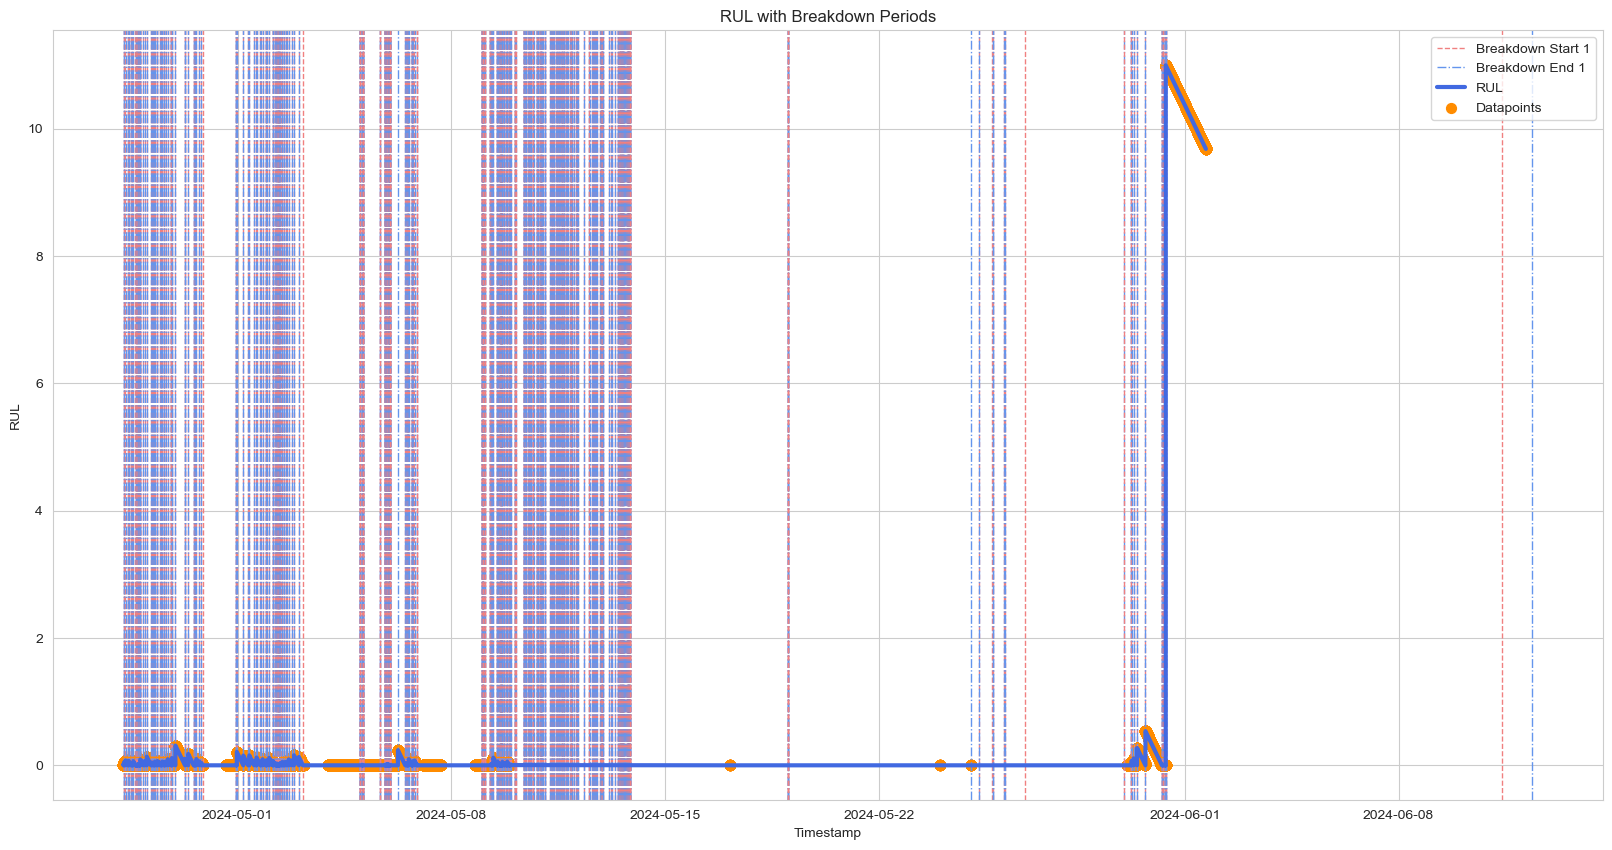

In [24]:
rul_graph_generator(wc111, wc111BD)

GRAPHS FOR DATASET 112

In [25]:
wc112, wc112BD = preprocess(wc112, wc112BD)
wc112 = compute_rul(wc112, wc112BD)

ParameterName                                Back Pressure  \
ParameterName                                                
Back Pressure                                     1.000000   
Barrel Temp. Zone 1                                    NaN   
Barrel Temp. Zone 2                                    NaN   
Barrel Temp. Zone 3                                    NaN   
Barrel Temp. Zone 4                                    NaN   
Closed Shutter injection nozzle first step             NaN   
Closed Shutter injection nozzle second step            NaN   
Cooling Time                                           NaN   
Cushion                                          -0.412673   
Cycle Time                                             NaN   
Decompression after stroke                             NaN   
Decompression before stroke                            NaN   
Dosage Stroke                                          NaN   
Injection Pressure Actual                              NaN   
Injectio

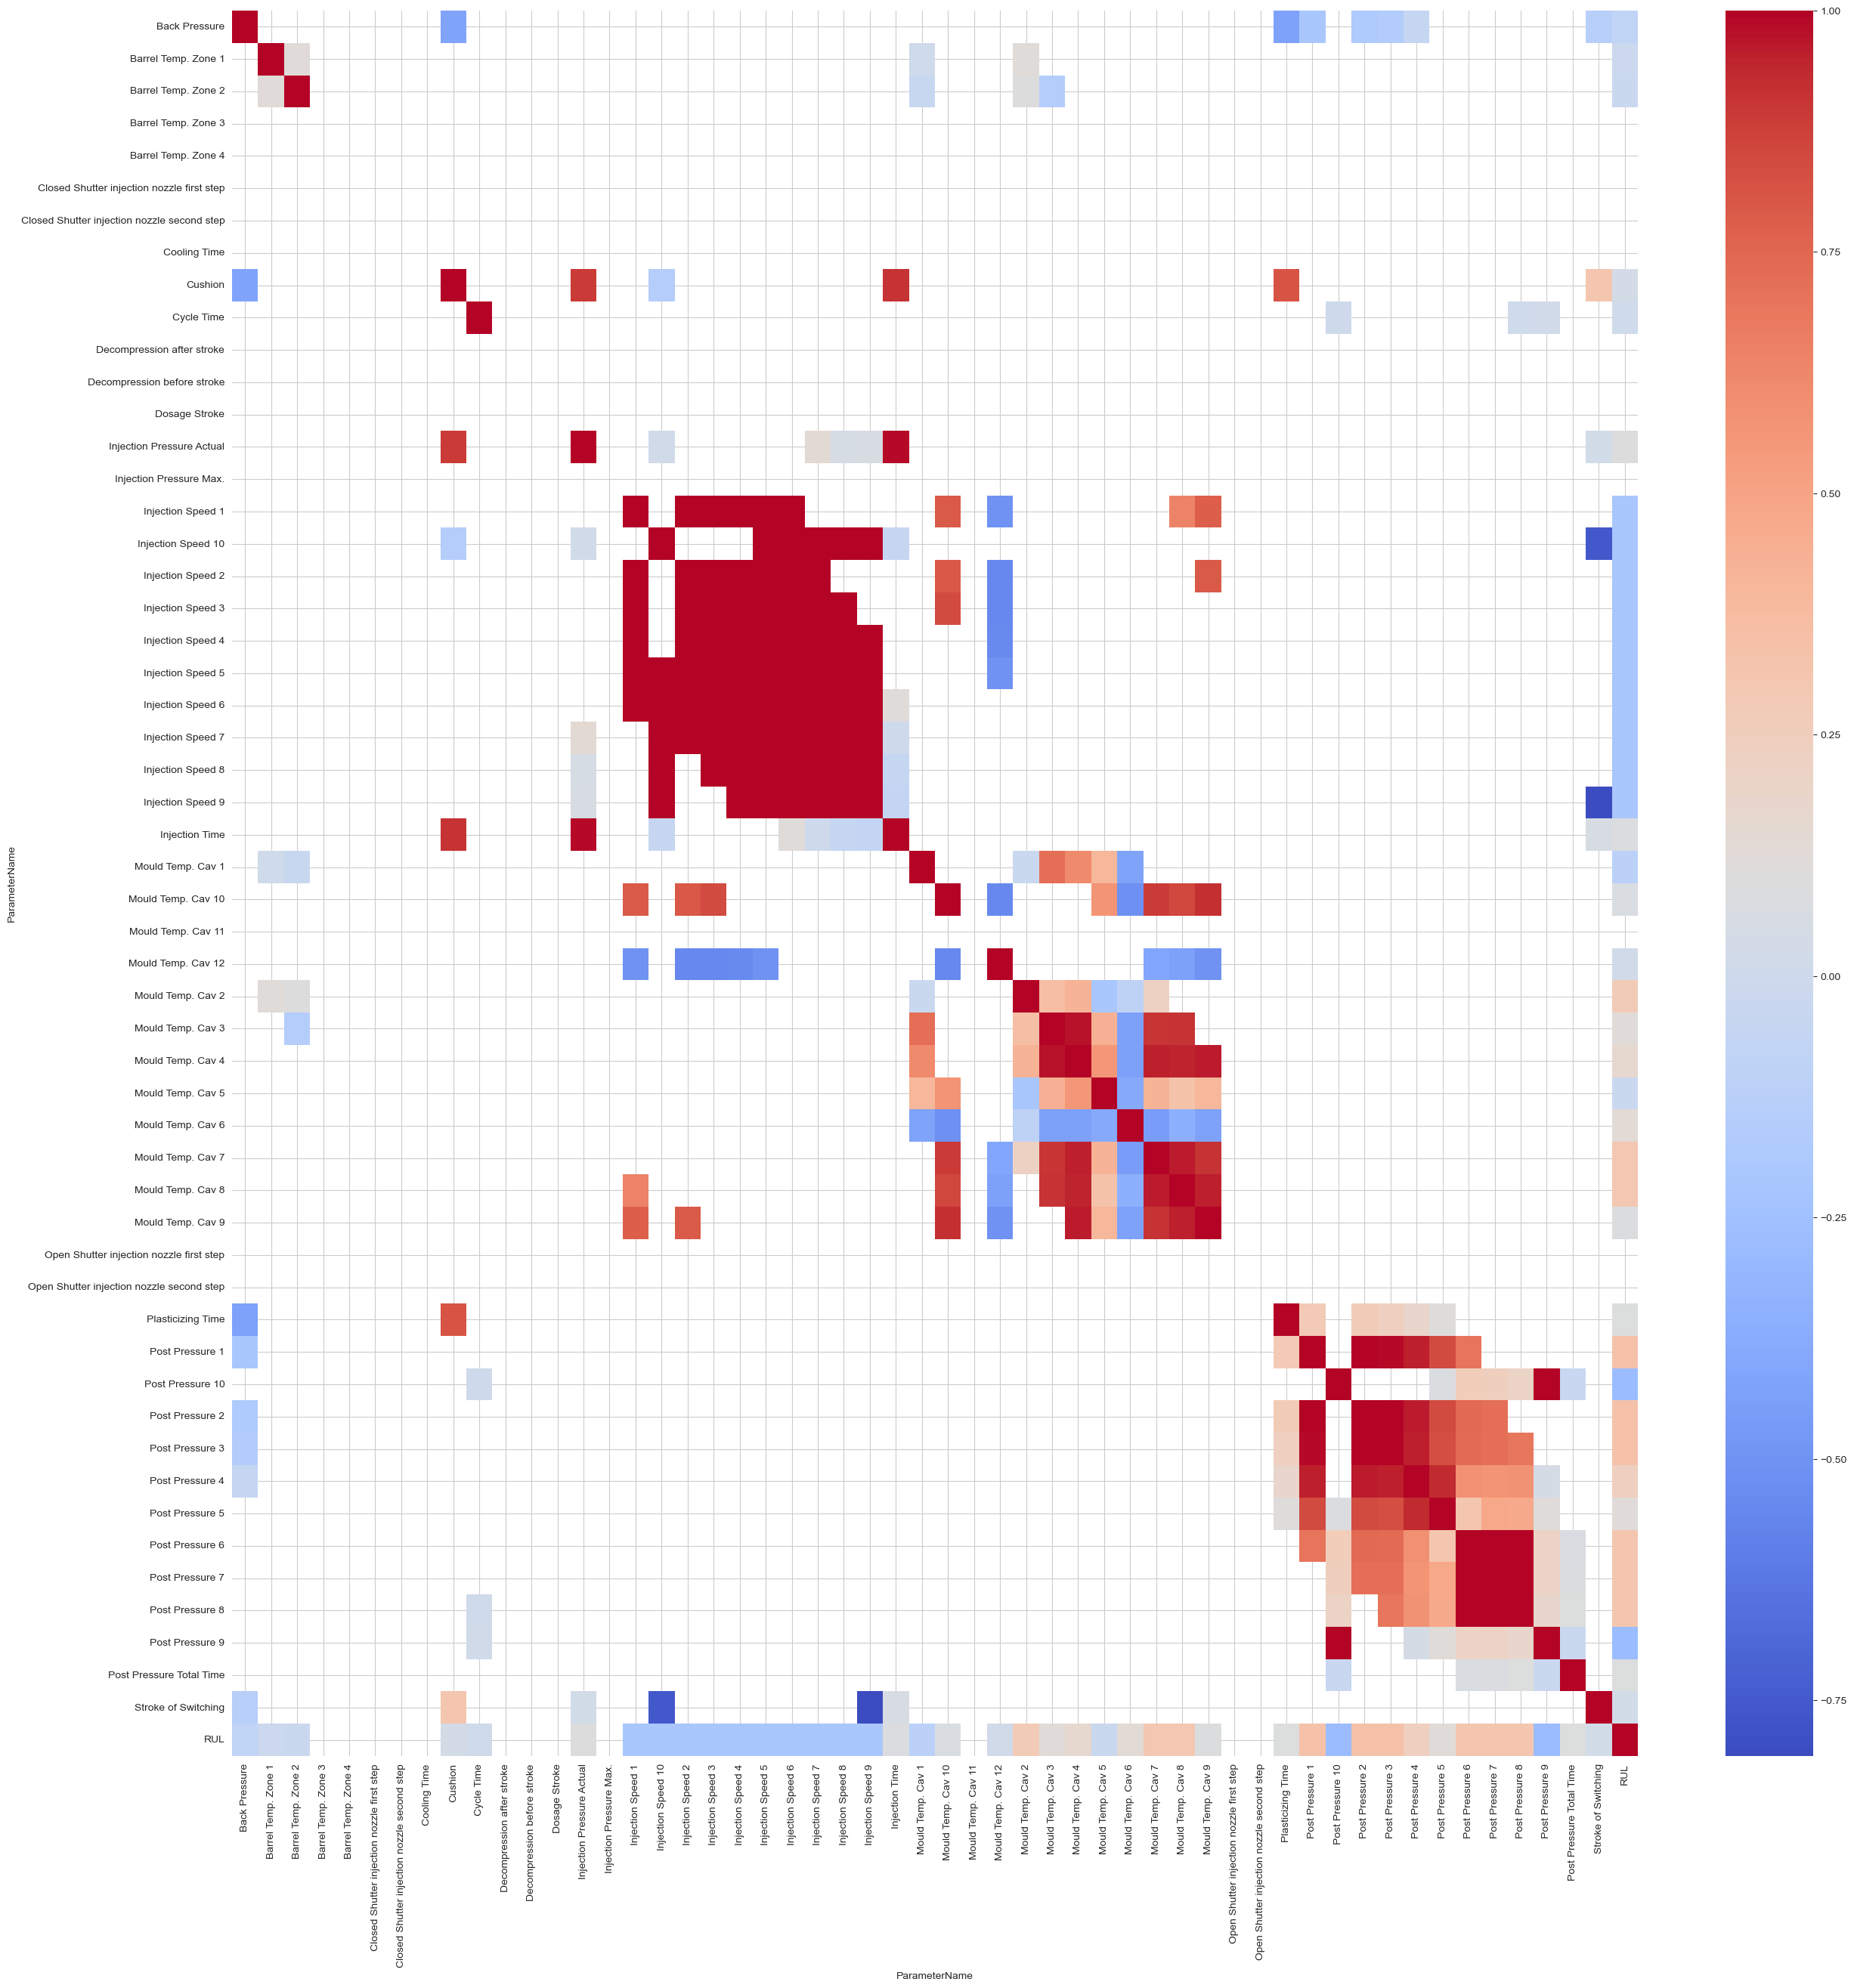

In [26]:
correlation_matrix_generator(wc112)

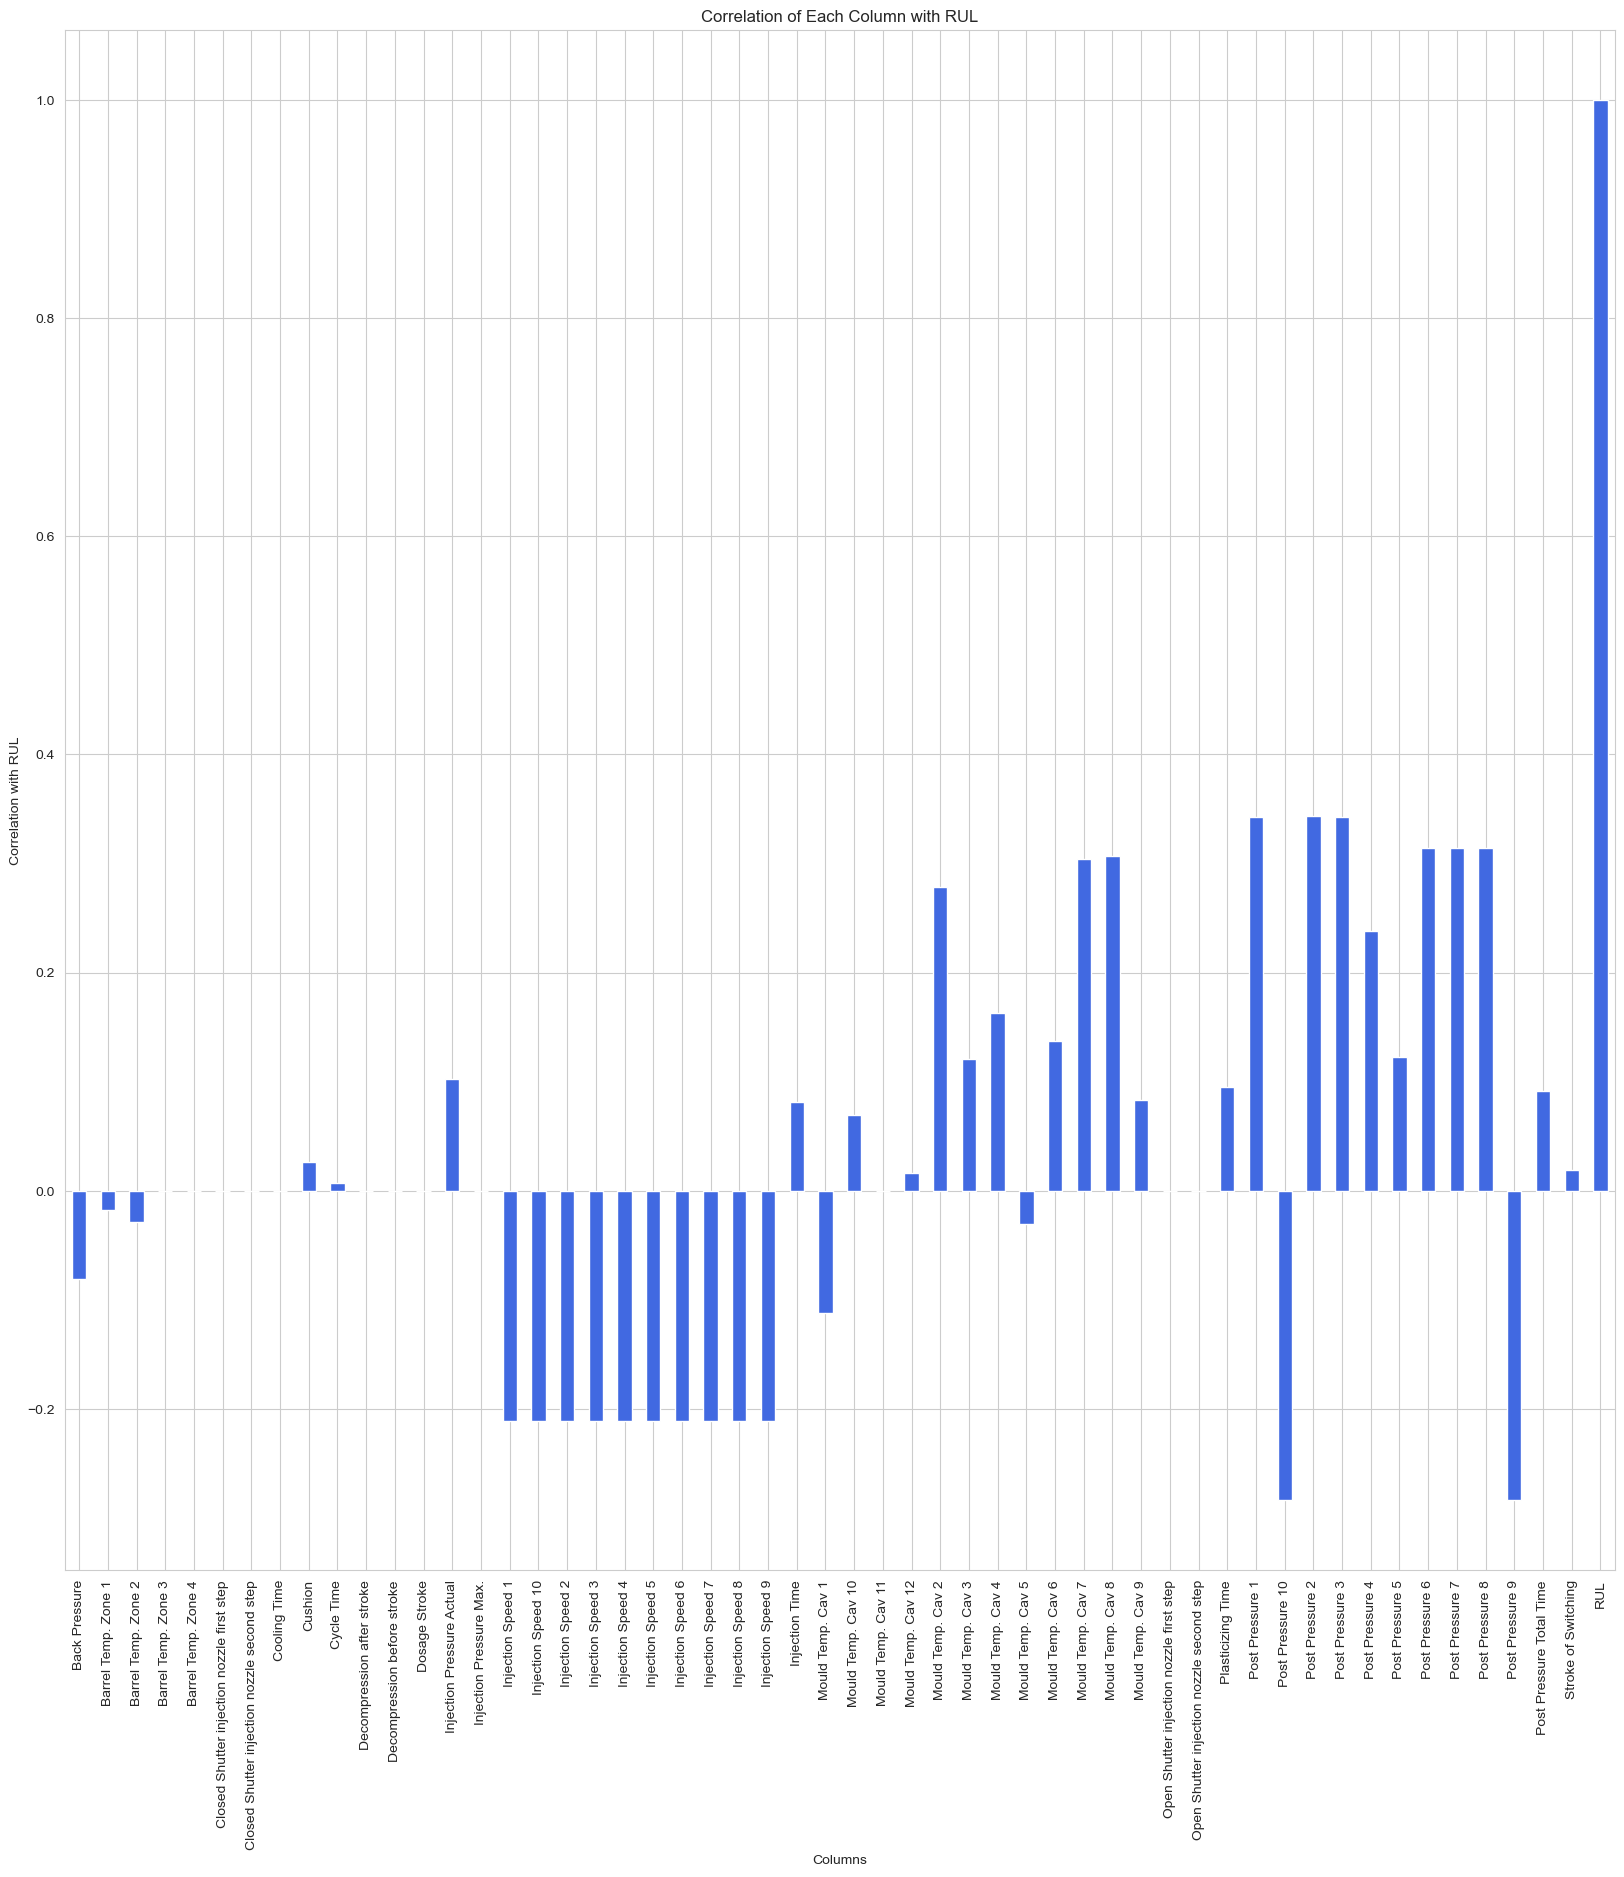

In [27]:
correlations_with_rul(wc112)

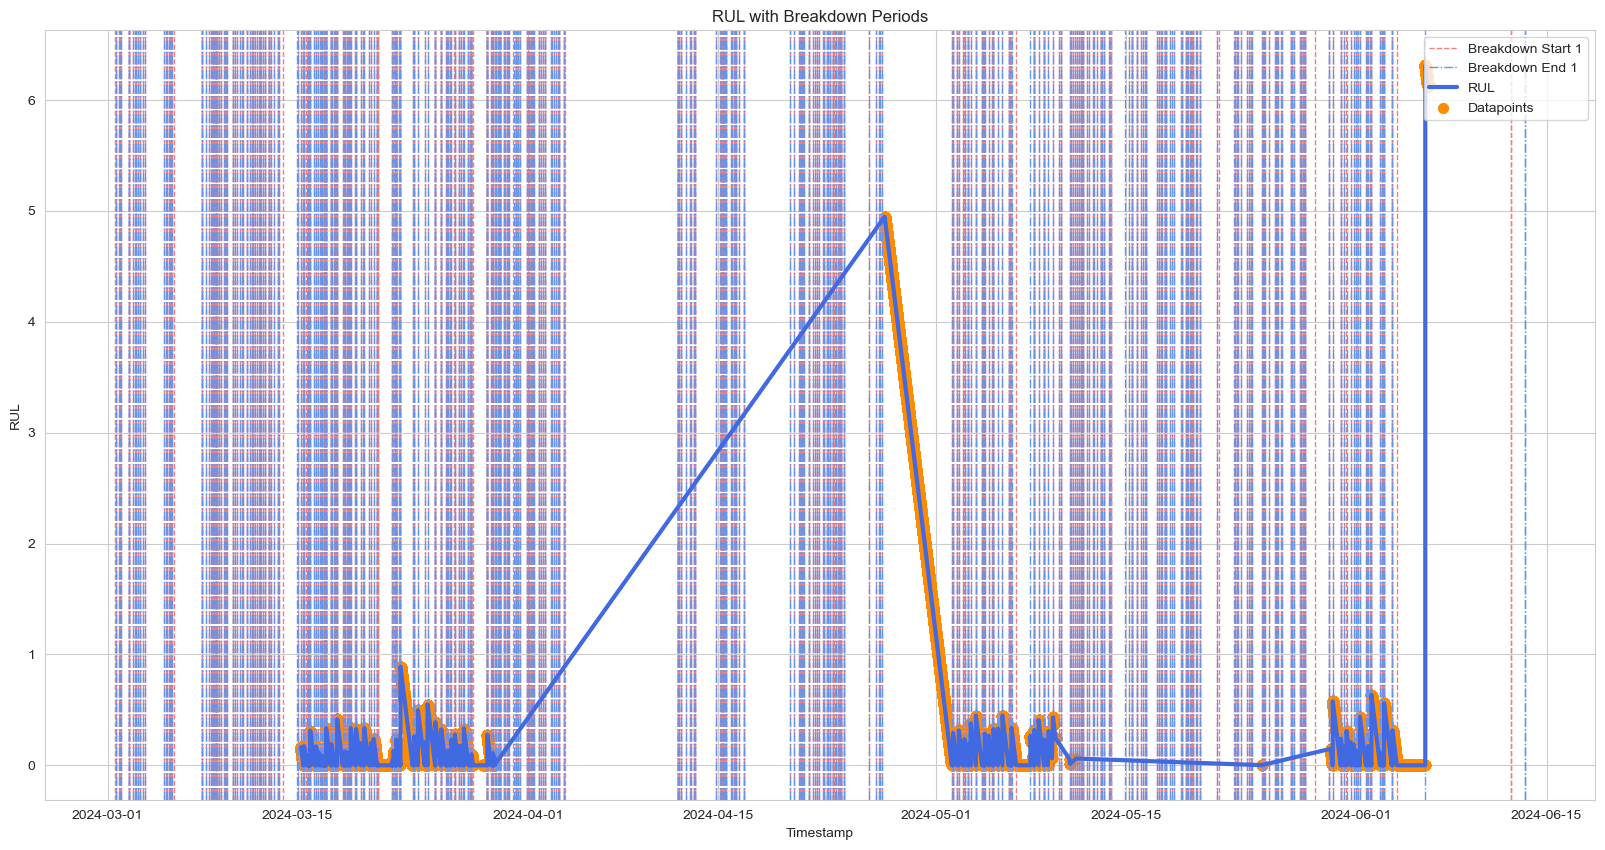

In [28]:
rul_graph_generator(wc112, wc112BD)

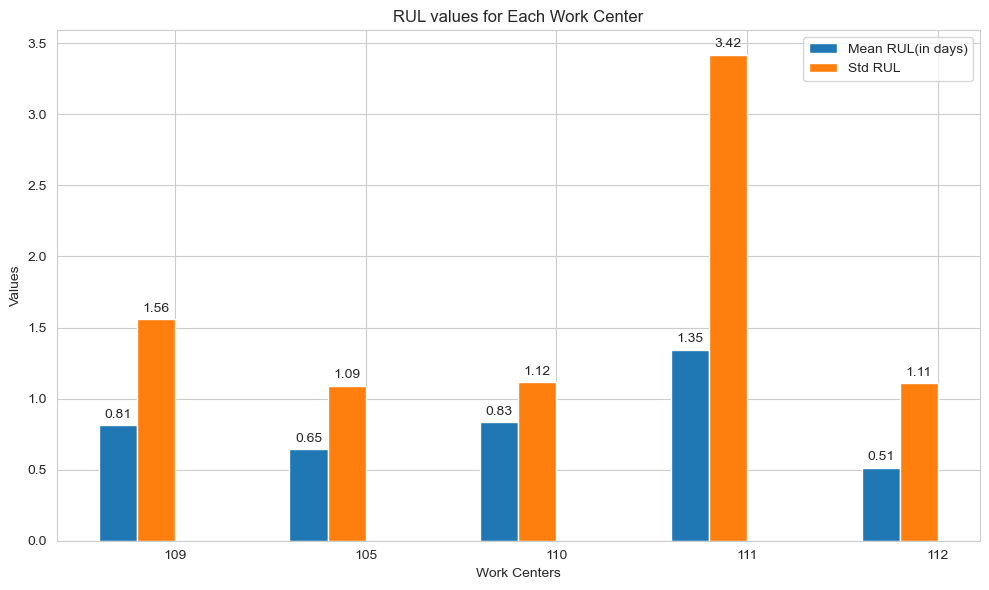

In [34]:
datasets = [wc109,wc105,wc110,wc111,wc112]
rul_result = {
    "Work Center":["109", "105", "110", "111", "112"],
    "Mean RUL": [],
    "Std RUL": [],
}
for data in datasets:
    if "RUL" in data.columns:
        rul = data["RUL"].values 
        rul_result["Mean RUL"].append(np.mean(rul))
        rul_result["Std RUL"].append(np.std(rul))


station_names = rul_result["Work Center"]
mean_rul = rul_result["Mean RUL"]
std_rul = rul_result["Std RUL"]

x = np.arange(len(station_names))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(x - 1.5*width, mean_rul, width, label='Mean RUL(in days)')
bars2 = ax.bar(x - 0.5*width, std_rul, width, label='Std RUL')

ax.set_xlabel('Work Centers')
ax.set_ylabel('Values')
ax.set_title('RUL values for Each Work Center')
ax.set_xticks(x)
ax.set_xticklabels(station_names)  # Setting work center names as x-ticks
ax.legend()

# Adding labels to the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',  # Formatting the label with 2 decimal places
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Slight offset above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.tight_layout()
plt.show()